In [1]:
import os, pytz, random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from  datetime import datetime as dt, timedelta

import gc

In [2]:
gc.collect()

0

In [3]:
# Load datasets

keystrokes_df = pd.read_csv('./dataset/keystrokes.csv')
students_df = pd.read_csv('./dataset/students.csv')
keystrokes_df.head()

,EventID,SubjectID,AssignmentID,CodeStateSection,EventType,SourceLocation,EditType,InsertText,DeleteText,X-Metadata,ClientTimestamp
0,3,Student1,Assign6,task1.py,File.Edit,0.0,Insert,# @@@@@@@@@@@@@\n# CS1400 - MW1\n# Assignment ??,NaN,NaN,2021-10-17 21:36:30.335
1,4,Student1,Assign6,task1.py,File.Edit,46.0,Insert,\n,NaN,NaN,2021-10-17 21:36:32.015
2,5,Student1,Assign6,task1.py,File.Edit,44.0,Delete,NaN,??,NaN,2021-10-17 21:36:55.006
3,6,Student1,Assign6,task1.py,File.Edit,44.0,Insert,6,NaN,NaN,2021-10-17 21:36:55.021
4,7,Student1,Assign6,task1.py,X-Keystroke,45.0,NaN,NaN,NaN,6,2021-10-17 21:36:55.029


In [4]:
# Get feature-1 (number of errors)
 
students = [f'Student{i}' for i in range(1, 45)]  
assignments = [f'Assign{j}' for j in range(6, 14)]  
error_results = []

for student in students:
    for assignment in assignments:
        temp_df = keystrokes_df[
            (keystrokes_df["SubjectID"] == student) &
            (keystrokes_df["AssignmentID"] == assignment)
        ]
        
        sorted_df = temp_df.sort_values("ClientTimestamp", ascending=False)
        run_program_df = sorted_df[sorted_df['EventType'].isin(['Run.Program'])]
        run_metadata = run_program_df["X-Metadata"].value_counts()
        
        # Get the count of 0 score (error/failed to compile)
        error_count = run_metadata.get("0", 0)
        
        error_results.append({
            "Student": student,
            "Assignment": assignment,
            "Error_Count": error_count
        })

errors_df = pd.DataFrame(error_results)

print(errors_df)
#errors_df.to_csv("errors_count.csv")


       Student Assignment  Error_Count
0     Student1    Assign6           34
1     Student1    Assign7           20
2     Student1    Assign8            1
3     Student1    Assign9           22
4     Student1   Assign10           16
..         ...        ...          ...
347  Student44    Assign9            0
348  Student44   Assign10           19
349  Student44   Assign11           28
350  Student44   Assign12           18
351  Student44   Assign13            0

[352 rows x 3 columns]


In [5]:
# Get feature-2 (number of compilations)
 
students = [f'Student{i}' for i in range(1, 45)]  
assignments = [f'Assign{j}' for j in range(6, 14)]  
compile_results = []

for student in students:
    for assignment in assignments:
        temp_df = keystrokes_df[
            (keystrokes_df["SubjectID"] == student) &
            (keystrokes_df["AssignmentID"] == assignment)
        ]
        
        sorted_df = temp_df.sort_values("ClientTimestamp", ascending=False)
        
        run_program_df = sorted_df[sorted_df['EventType'].isin(['Run.Program'])]
        run_metadata = run_program_df["X-Metadata"].value_counts()
        
        # Get the count of Start () or default to 0 if not present
        compile_count = run_metadata.get("Start", 0)
        
        compile_results.append({
            "Student": student,
            "Assignment": assignment,
            "Compilation_Count": compile_count
        })

compilations_df = pd.DataFrame(compile_results)

print(compilations_df)
#compilations_df.to_csv("compilation_count.csv")


       Student Assignment  Compilation_Count
0     Student1    Assign6                 40
1     Student1    Assign7                 31
2     Student1    Assign8                 21
3     Student1    Assign9                 44
4     Student1   Assign10                 67
..         ...        ...                ...
347  Student44    Assign9                  0
348  Student44   Assign10                115
349  Student44   Assign11                 65
350  Student44   Assign12                 33
351  Student44   Assign13                  0

[352 rows x 3 columns]


In [6]:
# Get feature-3 (mean time difference between 2 consecutive compilations/executions for all students)

compile_timediff = []

assignments = [f"Assign{i}" for i in range(6, 14)]
students = [f"Student{i}" for i in range(1, 45)]

for student in students:
    for assignment in assignments:
        
        temp_df2 = keystrokes_df[(keystrokes_df["SubjectID"] == student) & (keystrokes_df["AssignmentID"] == assignment)]
        sorted_df2 = temp_df2.sort_values("ClientTimestamp", ascending=True)  
        
        run_program_df2 = sorted_df2[sorted_df2["EventType"].isin(["Run.Program"])]
        run_metadata2_df = run_program_df2[run_program_df2["X-Metadata"] == "Start"]
        run_metadata2_df["ClientTimestamp"] = pd.to_datetime(run_metadata2_df["ClientTimestamp"])
        run_metadata2_df = run_metadata2_df.sort_values("ClientTimestamp")
        run_metadata2_df["TimeDifference"] = run_metadata2_df["ClientTimestamp"].diff()
        mean_time_difference = run_metadata2_df["TimeDifference"].mean()
        
        if pd.notna(mean_time_difference):
            mean_time_difference_seconds = mean_time_difference.total_seconds()
        else:
            mean_time_difference_seconds = None
        
        compile_timediff.append({
            "StudentID": student,
            "AssignmentID": assignment,
            "MeanTimeDifferenceSeconds": mean_time_difference_seconds
        })

compile_timediff_df = pd.DataFrame(compile_timediff)

print(compile_timediff_df)

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_41088/3415867638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_metadata2_df["ClientTimestamp"] = pd.to_datetime(run_metadata2_df["ClientTimestamp"])
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_41088/3415867638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_metadata2_df["ClientTimestamp"] = pd.to_datetime(run_metadata2_df["ClientTimestamp"])
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_41088/341586763

     StudentID AssignmentID  MeanTimeDifferenceSeconds
0     Student1      Assign6                2203.476307
1     Student1      Assign7                 723.473800
2     Student1      Assign8                 161.739250
3     Student1      Assign9                 244.912255
4     Student1     Assign10                 172.734196
..         ...          ...                        ...
347  Student44      Assign9                        NaN
348  Student44     Assign10                1557.472438
349  Student44     Assign11                2797.972734
350  Student44     Assign12               10770.620000
351  Student44     Assign13                        NaN

[352 rows x 3 columns]


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_41088/3415867638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_metadata2_df["ClientTimestamp"] = pd.to_datetime(run_metadata2_df["ClientTimestamp"])


In [7]:
# Replace NaN values with 0
compile_timediff_df2 = compile_timediff_df.fillna(0)
compile_timediff_df2
#compile_timediff_df2.to_csv("compile_timediff_df2.csv")

,StudentID,AssignmentID,MeanTimeDifferenceSeconds
0,Student1,Assign6,2203.476307
1,Student1,Assign7,723.473800
2,Student1,Assign8,161.739250
3,Student1,Assign9,244.912255
4,Student1,Assign10,172.734196
...,...,...,...
347,Student44,Assign9,0.000000
348,Student44,Assign10,1557.472438
349,Student44,Assign11,2797.972734
350,Student44,Assign12,10770.620000


In [8]:
# Get the feature-4 (Number of Short Pauses)

due_dates = pd.read_csv(f"./dataset/due.csv", usecols=["AssignmentID", "Due MST", "Timestamp"])
due_dates

students = list(keystrokes_df.SubjectID.value_counts().to_frame().index)
assignments = list(due_dates.AssignmentID)
num_of_pause = []

for student in students:
    for assignment in assignments:

        temp_df=keystrokes_df[keystrokes_df["SubjectID"]==student].sort_values("ClientTimestamp", ascending=False).sort_values("AssignmentID", ascending=False)
        temp_df["ClientTimestamp"] = pd.to_datetime(temp_df["ClientTimestamp"])
        keystroke_timedelta = (temp_df[temp_df["AssignmentID"]==assignment].sort_values("ClientTimestamp", ascending=False)["ClientTimestamp"].shift(periods=1) - temp_df[temp_df["AssignmentID"]==assignment].sort_values("ClientTimestamp", ascending=False)["ClientTimestamp"]).sort_values(ascending=False)
        
        # Count pause between 10 seconds and 45 seconds
        num_of_pauses = len(keystroke_timedelta[keystroke_timedelta > timedelta(seconds=0)][keystroke_timedelta < timedelta(seconds=45)])  
        
        num_of_pause.append({
            "Student": student,
            "Assignment": assignment,
            "NumOfShortPauses": num_of_pauses
        })

num_of_pauses_df = pd.DataFrame(num_of_pause)

print(num_of_pauses_df)
#num_of_pauses_df.to_csv("num_of_pauses.csv")



       Student Assignment  NumOfShortPauses
0    Student26    Assign6             19352
1    Student26    Assign7             27359
2    Student26    Assign8              9722
3    Student26    Assign9             25486
4    Student26   Assign10               777
..         ...        ...               ...
347  Student25    Assign9                 0
348  Student25   Assign10                 0
349  Student25   Assign11                 0
350  Student25   Assign12                 0
351  Student25   Assign13                 0

[352 rows x 3 columns]


In [9]:
# Get feature-5 (Number of Medium Pauses)

students = list(keystrokes_df.SubjectID.value_counts().to_frame().index)
assignments = list(due_dates.AssignmentID)
num_of_med_pause = []


for student in students:
    for assignment in assignments:

        temp_df=keystrokes_df[keystrokes_df["SubjectID"]==student].sort_values("ClientTimestamp", ascending=False).sort_values("AssignmentID", ascending=False)
        temp_df["ClientTimestamp"] = pd.to_datetime(temp_df["ClientTimestamp"])
        keystroke_timedelta = (temp_df[temp_df["AssignmentID"]==assignment].sort_values("ClientTimestamp", ascending=False)["ClientTimestamp"].shift(periods=1) - temp_df[temp_df["AssignmentID"]==assignment].sort_values("ClientTimestamp", ascending=False)["ClientTimestamp"]).sort_values(ascending=False)
        
        # Count pause between 45 seconds and 6 minutes
        num_of_med_pauses = len(keystroke_timedelta[keystroke_timedelta > timedelta(seconds=45)][keystroke_timedelta < timedelta(minutes=6)])  
        
        num_of_med_pause.append({
            "Student": student,
            "Assignment": assignment,
            "NumOfMediumPauses": num_of_med_pauses
        })

num_of_med_pauses_df = pd.DataFrame(num_of_med_pause)

print(num_of_med_pauses_df)
#num_of_med_pauses_df.to_csv("num_of_med_pauses.csv")


       Student Assignment  NumOfMediumPauses
0    Student26    Assign6                153
1    Student26    Assign7                175
2    Student26    Assign8                 66
3    Student26    Assign9                256
4    Student26   Assign10                 85
..         ...        ...                ...
347  Student25    Assign9                  0
348  Student25   Assign10                  0
349  Student25   Assign11                  0
350  Student25   Assign12                  0
351  Student25   Assign13                  0

[352 rows x 3 columns]


In [10]:
# Get feature-6 (Number of Long Pauses)

students = list(keystrokes_df.SubjectID.value_counts().to_frame().index)
assignments = list(due_dates.AssignmentID)
num_of_long_pause = []

for student in students:
    for assignment in assignments:

        temp_df=keystrokes_df[keystrokes_df["SubjectID"]==student].sort_values("ClientTimestamp", ascending=False).sort_values("AssignmentID", ascending=False)
        temp_df["ClientTimestamp"] = pd.to_datetime(temp_df["ClientTimestamp"])
        keystroke_timedelta = (temp_df[temp_df["AssignmentID"]==assignment].sort_values("ClientTimestamp", ascending=False)["ClientTimestamp"].shift(periods=1) - temp_df[temp_df["AssignmentID"]==assignment].sort_values("ClientTimestamp", ascending=False)["ClientTimestamp"]).sort_values(ascending=False)
        
        # Count pause between 6 minutes and 10 minutes
        num_of_long_pauses = len(keystroke_timedelta[keystroke_timedelta > timedelta(minutes=6)][keystroke_timedelta < timedelta(minutes=10)])  
        
        num_of_long_pause.append({
            "Student": student,
            "Assignment": assignment,
            "NumOfLongPauses": num_of_long_pauses
        })

num_of_long_pauses_df = pd.DataFrame(num_of_long_pause)

print(num_of_long_pauses_df)
#num_of_long_pauses_df.to_csv("num_of_long_pauses.csv")

       Student Assignment  NumOfLongPauses
0    Student26    Assign6               13
1    Student26    Assign7                6
2    Student26    Assign8                9
3    Student26    Assign9               17
4    Student26   Assign10               12
..         ...        ...              ...
347  Student25    Assign9                0
348  Student25   Assign10                0
349  Student25   Assign11                0
350  Student25   Assign12                0
351  Student25   Assign13                0

[352 rows x 3 columns]


In [11]:
# Get feature-7 (number of semicolon keys)
 
students = [f'Student{i}' for i in range(1, 45)]  
assignments = [f'Assign{j}' for j in range(6, 14)]  
semicolon_key_results = []

for student in students:
    for assignment in assignments:
        temp_df = keystrokes_df[
            (keystrokes_df["SubjectID"] == student) &
            (keystrokes_df["AssignmentID"] == assignment)
        ]
        
        sorted_df = temp_df.sort_values("ClientTimestamp", ascending=False)
        value_counts = sorted_df["X-Metadata"].value_counts()
        semicolon_key_count = value_counts.get(";", 0)
        
        semicolon_key_results.append({
            "Student": student,
            "Assignment": assignment,
            "Semicolon_Keys": semicolon_key_count
        })

semicolon_key_df = pd.DataFrame(semicolon_key_results)

print(semicolon_key_df)

       Student Assignment  Semicolon_Keys
0     Student1    Assign6               0
1     Student1    Assign7               0
2     Student1    Assign8               1
3     Student1    Assign9               0
4     Student1   Assign10               0
..         ...        ...             ...
347  Student44    Assign9               0
348  Student44   Assign10               0
349  Student44   Assign11               0
350  Student44   Assign12               1
351  Student44   Assign13               0

[352 rows x 3 columns]


In [12]:
# Get feature-8 (number of "print" keys)

student_ids = ["Student" + str(i) for i in range(1, 45)]
assignment_ids = ["Assign" + str(i) for i in range(6, 14)]
print_key_results = []

for student_id in student_ids:
    for assignment_id in assignment_ids:
        insert_filtered_data = keystrokes_df[keystrokes_df["SubjectID"] == student_id].sort_values("ClientTimestamp", ascending=True)
        insert_filtered_data = insert_filtered_data[insert_filtered_data["AssignmentID"] == assignment_id]
        insert_filtered_data['ContainsPrint'] = insert_filtered_data["InsertText"].str.contains("print", case=True, na=False)
        print_key_count = insert_filtered_data['ContainsPrint'].sum()
        #print(f"{student_id} - {assignment_id}: Number of 'print' occurrences: {print_key_count}")
        
        print_key_results.append({
            "StudentID": student_id,
            "AssignmentID": assignment_id,
            "PrintCount": print_key_count
        })

print_key_results_df = pd.DataFrame(print_key_results)
print(print_key_results_df)
#print_key_results_df.to_csv('print_key_results.csv')


     StudentID AssignmentID  PrintCount
0     Student1      Assign6           1
1     Student1      Assign7           0
2     Student1      Assign8           1
3     Student1      Assign9           3
4     Student1     Assign10           1
..         ...          ...         ...
347  Student44      Assign9           0
348  Student44     Assign10           4
349  Student44     Assign11           2
350  Student44     Assign12           5
351  Student44     Assign13           0

[352 rows x 3 columns]


In [13]:
# Get feature-9 (number of "while" keys)

student_ids = ["Student" + str(i) for i in range(1, 45)]
assignment_ids = ["Assign" + str(i) for i in range(6, 14)]
while_key_results = []

for student_id in student_ids:
    for assignment_id in assignment_ids:
        insert_filtered_data = keystrokes_df[keystrokes_df["SubjectID"] == student_id].sort_values("ClientTimestamp", ascending=True)
        insert_filtered_data = insert_filtered_data[insert_filtered_data["AssignmentID"] == assignment_id]
        insert_filtered_data['ContainsWhile'] = insert_filtered_data["InsertText"].str.contains("while", case=True, na=False)
        while_key_count = insert_filtered_data['ContainsWhile'].sum()
        #print(f"{student_id} - {assignment_id}: Number of 'while' occurrences: {while_key_count}")
        
        while_key_results.append({
            "StudentID": student_id,
            "AssignmentID": assignment_id,
            "WhileCount": while_key_count
        })

while_key_results_df = pd.DataFrame(while_key_results)
print(while_key_results_df)
#while_key_results_df.to_csv('while_key_results.csv')

     StudentID AssignmentID  WhileCount
0     Student1      Assign6           0
1     Student1      Assign7           0
2     Student1      Assign8           1
3     Student1      Assign9           3
4     Student1     Assign10           1
..         ...          ...         ...
347  Student44      Assign9           0
348  Student44     Assign10           0
349  Student44     Assign11           1
350  Student44     Assign12           0
351  Student44     Assign13           0

[352 rows x 3 columns]


In [14]:
# Get feature-10 (number of "for" keys)

student_ids = ["Student" + str(i) for i in range(1, 45)]
assignment_ids = ["Assign" + str(i) for i in range(6, 14)]
for_key_results = []

for student_id in student_ids:
    for assignment_id in assignment_ids:
        insert_filtered_data = keystrokes_df[keystrokes_df["SubjectID"] == student_id].sort_values("ClientTimestamp", ascending=True)
        insert_filtered_data = insert_filtered_data[insert_filtered_data["AssignmentID"] == assignment_id]
        insert_filtered_data['ContainsFor'] = insert_filtered_data["InsertText"].str.contains("for", case=True, na=False)
        for_key_count = insert_filtered_data['ContainsFor'].sum()
        #print(f"{student_id} - {assignment_id}: Number of 'for' occurrences: {for_key_count}")
        
        for_key_results.append({
            "StudentID": student_id,
            "AssignmentID": assignment_id,
            "ForCount": for_key_count
        })

for_key_results_df = pd.DataFrame(for_key_results)
print(for_key_results_df)
#for_key_results_df.to_csv('for_key_results.csv')


     StudentID AssignmentID  ForCount
0     Student1      Assign6         1
1     Student1      Assign7         2
2     Student1      Assign8         1
3     Student1      Assign9         3
4     Student1     Assign10         0
..         ...          ...       ...
347  Student44      Assign9         0
348  Student44     Assign10         1
349  Student44     Assign11         1
350  Student44     Assign12         4
351  Student44     Assign13         0

[352 rows x 3 columns]


In [15]:
# Get feature-11 (number of "space" keys)
 
students = [f'Student{i}' for i in range(1, 45)] 
assignments = [f'Assign{j}' for j in range(6, 14)]  
space_key_results = []

for student in students:
    for assignment in assignments:
        temp_df = keystrokes_df[
            (keystrokes_df["SubjectID"] == student) &
            (keystrokes_df["AssignmentID"] == assignment)
        ]
        
        sorted_df = temp_df.sort_values("ClientTimestamp", ascending=False)
        value_counts = sorted_df["X-Metadata"].value_counts()
        space_key_count = value_counts.get(" ", 0)
        
        space_key_results.append({
            "Student": student,
            "Assignment": assignment,
            "Space_Keys": space_key_count
        })

space_key_df = pd.DataFrame(space_key_results)
print(space_key_df)
#space_key_df.to_csv("space_key.csv")

       Student Assignment  Space_Keys
0     Student1    Assign6         386
1     Student1    Assign7         146
2     Student1    Assign8         209
3     Student1    Assign9          43
4     Student1   Assign10           0
..         ...        ...         ...
347  Student44    Assign9         124
348  Student44   Assign10           2
349  Student44   Assign11         149
350  Student44   Assign12         186
351  Student44   Assign13           0

[352 rows x 3 columns]


In [15]:
# Get feature-12 (keystrokes count)

#from collections import defaultdict
student_ids = ["Student" + str(i) for i in range(1, 45)]
assignment_ids = ["Assign" + str(i) for i in range(6, 14)]
results = []

for student_id in student_ids:
    for assignment_id in assignment_ids:
        filtered_data = keystrokes_df[keystrokes_df["SubjectID"] == student_id].sort_values("ClientTimestamp", ascending=True)
        result = filtered_data[filtered_data["AssignmentID"] == assignment_id]["AssignmentID"].value_counts()
        #print(f"{student_id} - {assignment_id}:\n{result}")
        num_unique_assignments = len(result)
        
        for i in range(num_unique_assignments):
            k_count = result.iloc[i]
            results.append({"StudentID": student_id, "AssignmentID": assignment_id, "Count": k_count})

keystrokes_count_df = pd.DataFrame(results)
print(keystrokes_count_df)
#keystrokes_count_df.to_csv("keystrokes_count2.csv")


     StudentID AssignmentID  Count
0     Student1      Assign6   7377
1     Student1      Assign7   4467
2     Student1      Assign8   6257
3     Student1      Assign9   3546
4     Student1     Assign10    279
..         ...          ...    ...
257  Student44      Assign8   6652
258  Student44      Assign9   3194
259  Student44     Assign10    402
260  Student44     Assign11   3276
261  Student44     Assign12   4146

[262 rows x 3 columns]


In [16]:
students_df

,Unnamed: 0,SubjectID,Assign6,Assign7,Assign8,Assign9,Assign10,Assign11,Assign12,Assign13,Exam1,Exam2,Exam3,FinalScore,major,HighestACT,HighSchoolGPA
0,0,Student11,70.0,88.0,45.0,63.0,86.0,97.0,20.0,88.0,82.00,82.0,78.0,89.58,Non-Matriculated,NaN,NaN
1,1,Student23,100.0,100.0,100.0,98.0,0.0,91.0,94.0,0.0,74.00,78.0,82.0,90.98,Physics,28.0,4.000
2,2,Student21,90.0,96.0,98.0,95.0,77.0,0.0,97.0,56.0,68.67,78.0,80.0,90.79,Non-Matriculated,NaN,NaN
3,3,Student17,89.0,96.0,100.0,94.0,91.0,100.0,89.0,0.0,88.00,84.0,80.0,96.95,Statistics,26.0,3.933
4,4,Student7,100.0,100.0,99.5,97.0,100.0,95.0,98.0,18.0,90.00,90.0,86.0,100.52,Math/Stats - Comp Teaching,35.0,4.000
5,5,Student29,100.0,100.0,100.0,100.0,94.0,100.0,100.0,56.0,86.00,84.0,80.0,100.60,Civil Engineering,33.0,4.000
6,6,Student30,95.0,100.0,98.0,98.0,96.0,92.0,97.0,15.0,86.00,80.0,80.0,96.99,Civil Engineering,24.0,3.980
7,7,Student10,95.0,100.0,100.0,85.0,88.0,94.0,100.0,0.0,88.00,86.0,84.0,97.60,Non-Matriculated,30.0,3.680
8,8,Student24,0.0,100.0,99.0,87.0,97.0,92.0,96.0,78.0,86.00,82.0,76.0,91.05,Mathematics,32.0,4.000
9,9,Student15,93.0,86.0,100.0,92.0,83.0,93.0,76.0,66.0,84.00,82.0,84.0,96.88,Computer Science,25.0,3.830


In [17]:
students_df = students_df.replace(-50,50)
students_df = students_df.drop(['Unnamed: 0', 'major', 'HighestACT', 'HighSchoolGPA'], axis=1)

In [18]:
students_df.fillna(0, inplace=True)
students_df


,SubjectID,Assign6,Assign7,Assign8,Assign9,Assign10,Assign11,Assign12,Assign13,Exam1,Exam2,Exam3,FinalScore
0,Student11,70.0,88.0,45.0,63.0,86.0,97.0,20.0,88.0,82.00,82.0,78.0,89.58
1,Student23,100.0,100.0,100.0,98.0,0.0,91.0,94.0,0.0,74.00,78.0,82.0,90.98
2,Student21,90.0,96.0,98.0,95.0,77.0,0.0,97.0,56.0,68.67,78.0,80.0,90.79
3,Student17,89.0,96.0,100.0,94.0,91.0,100.0,89.0,0.0,88.00,84.0,80.0,96.95
4,Student7,100.0,100.0,99.5,97.0,100.0,95.0,98.0,18.0,90.00,90.0,86.0,100.52
5,Student29,100.0,100.0,100.0,100.0,94.0,100.0,100.0,56.0,86.00,84.0,80.0,100.60
6,Student30,95.0,100.0,98.0,98.0,96.0,92.0,97.0,15.0,86.00,80.0,80.0,96.99
7,Student10,95.0,100.0,100.0,85.0,88.0,94.0,100.0,0.0,88.00,86.0,84.0,97.60
8,Student24,0.0,100.0,99.0,87.0,97.0,92.0,96.0,78.0,86.00,82.0,76.0,91.05
9,Student15,93.0,86.0,100.0,92.0,83.0,93.0,76.0,66.0,84.00,82.0,84.0,96.88


In [19]:
# Get the assignment-scores for each students and assignments

assignments_order = ['Assign6', 'Assign7', 'Assign8', 'Assign9', 'Assign10', 'Assign11', 'Assign12', 'Assign13']
melted_df = students_df.melt(id_vars=['SubjectID'], 
                              value_vars=assignments_order,  
                              var_name='Assignment', 
                              value_name='Score')

melted_df['Assignment'] = pd.Categorical(melted_df['Assignment'], categories=assignments_order, ordered=True)
melted_df_sorted = melted_df.sort_values(by=['SubjectID', 'Assignment'], ascending=[True, True])

print(melted_df_sorted)

    SubjectID Assignment  Score
19   Student1    Assign6   99.0
63   Student1    Assign7   99.0
107  Student1    Assign8  100.0
151  Student1    Assign9  100.0
195  Student1   Assign10   98.0
..        ...        ...    ...
162  Student9    Assign9   56.0
206  Student9   Assign10   57.0
250  Student9   Assign11   66.0
294  Student9   Assign12   79.0
338  Student9   Assign13   50.0

[352 rows x 3 columns]


In [20]:
# Reset index
melted_df_sorted_reset = melted_df_sorted.reset_index(drop=True)
print(melted_df_sorted_reset)
#melted_df_sorted_reset.to_csv("assignment_scores.csv")

    SubjectID Assignment  Score
0    Student1    Assign6   99.0
1    Student1    Assign7   99.0
2    Student1    Assign8  100.0
3    Student1    Assign9  100.0
4    Student1   Assign10   98.0
..        ...        ...    ...
347  Student9    Assign9   56.0
348  Student9   Assign10   57.0
349  Student9   Assign11   66.0
350  Student9   Assign12   79.0
351  Student9   Assign13   50.0

[352 rows x 3 columns]


##### For clustering, I have twelve features so I utilize PCA & TSNE for dimensionality reduction. 

##### 1. Hierarchical (Agglomerative) Clustering with PCA

Maximum distance: 12.692051694215293
Maximum Distance Difference: 5.392529008820223
Threshold Set At Distance: 5.235907755662253


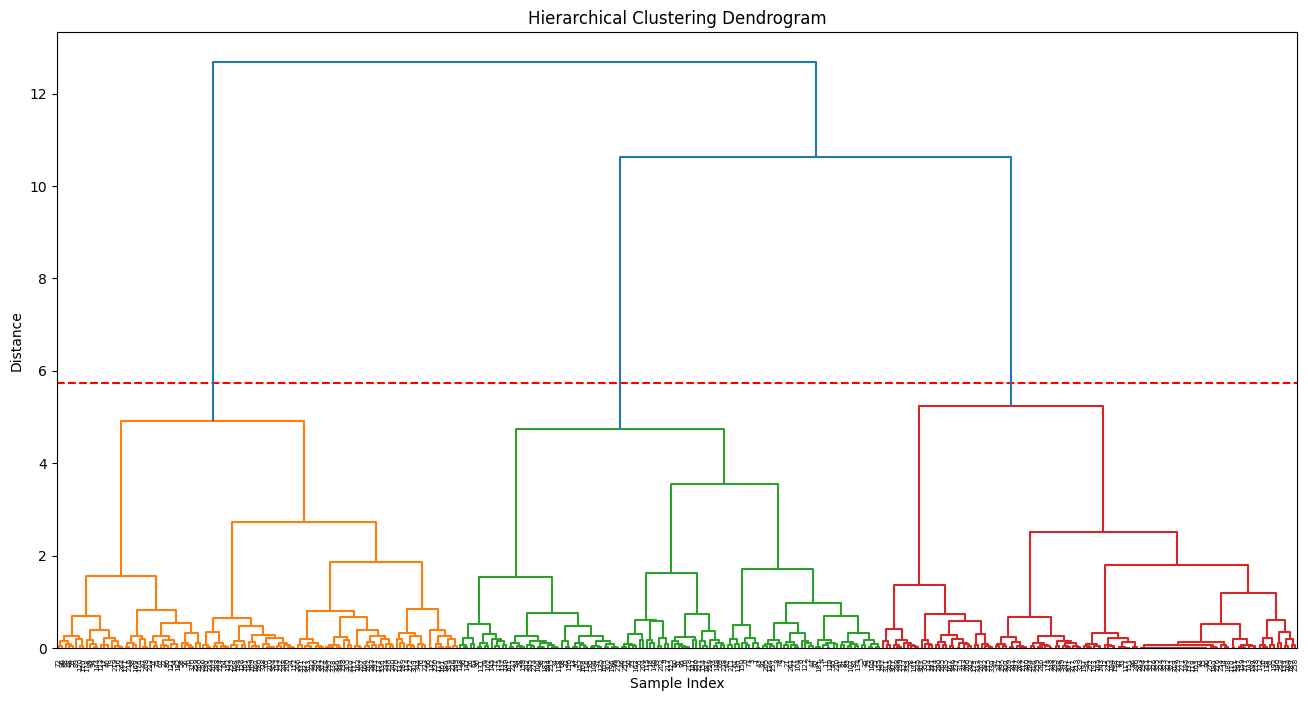

In [21]:
# Generate dendrogram for Agglomerative clustering with PCA

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

error_count_df = pd.read_csv('./features_results/errors_count.csv')
compilation_count_df = pd.read_csv('./features_results/compilation_count.csv')
compile_timediff_df = pd.read_csv('./features_results/compile_timediff_df2.csv')
#final_code_lines_df = pd.read_csv('./features_results/final_code_lines_count2.csv')
num_of_short_pause_df = pd.read_excel('./features_results/num_of_short_pauses.xlsx')
num_of_medium_pause_df = pd.read_excel('./features_results/num_of_medium_pauses.xlsx')
num_of_long_pause_df = pd.read_excel('./features_results/num_of_long_pauses.xlsx')
semicolon_key_df = pd.read_csv('./features_results/semicolon_key.csv')
print_key_df = pd.read_csv('./features_results/print_key_results.csv')
while_key_df = pd.read_csv('./features_results/while_key_results.csv')
for_key_df = pd.read_csv('./features_results/for_key_results.csv')
space_key_df = pd.read_csv('./features_results/space_key.csv')
keystrokes_count_df = pd.read_csv('./features_results/keystrokes_count.csv')
#assignment_score_df = pd.read_csv('./features_results/assignment_scores_2.csv')


error_count = error_count_df['Error_Count']
compilation_count = compilation_count_df['Compilation_Count']
compile_timediff = compile_timediff_df['MeanTimeDifferenceSeconds']
#final_code_lines_count = final_code_lines_df['Number of Lines']
num_of_short_pause = num_of_short_pause_df['NumOfShortPauses']
num_of_medium_pause = num_of_medium_pause_df['NumOfMediumPauses']
num_of_long_pause = num_of_long_pause_df['NumOfLongPauses']
semicolon_key = semicolon_key_df['Semicolon_Keys']
print_key = print_key_df['PrintCount']
while_key = while_key_df['WhileCount']
for_key = for_key_df['ForCount']
space_key = space_key_df['Space_Keys']
keystrokes_count = keystrokes_count_df['Count']
#assignment_score = assignment_score_df['Assignment_Score']


# Sample data
data = pd.DataFrame({
    'Feature1': error_count,
    'Feature2': compilation_count,
    'Feature3': compile_timediff,
    #'Feature14': final_code_lines_count,
    'Feature4': num_of_short_pause,
    'Feature5': num_of_medium_pause,
    'Feature6': num_of_long_pause,
    'Feature7': semicolon_key,
    'Feature8': print_key,
    'Feature9': while_key,
    'Feature10': for_key,
    'Feature11': space_key,
    'Feature12': keystrokes_count
    #'Feature13': assignment_score
})

# Normalize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_normalized = normalize(data_scaled)
data_normalized = pd.DataFrame(data_normalized)

pca = PCA(n_components=2)
data_principal = pca.fit_transform(data_normalized)
data_principal = pd.DataFrame(data_principal)
data_principal.columns =['P1', 'P2']

linked = linkage(data_principal, method='ward')

# Extract distances
distances = linked[:, 2]
max_distance = np.max(distances)
print("Maximum distance:", max_distance)

distance_differences = np.diff(distances)
max_distance_difference = np.max(distance_differences)
threshold_index = np.argmax(distance_differences)  
threshold = distances[threshold_index]  

print("Maximum Distance Difference:", max_distance_difference)
print("Threshold Set At Distance:", threshold)

plt.figure(figsize=(16, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Add the treshold line
plt.axhline(y=threshold+0.5, color='r', linestyle='--')

Dendrogram = shc.dendrogram(shc.linkage(data_principal, method = 'ward'))


In [22]:
data_principal

,P1,P2
0,0.505119,0.906111
1,0.364204,0.886849
2,0.205972,0.799179
3,0.430604,0.950259
4,-0.079855,0.652677
...,...,...
347,-0.663396,-0.431822
348,-0.523639,-0.537691
349,-0.481309,-0.699500
350,-0.067975,-0.525879


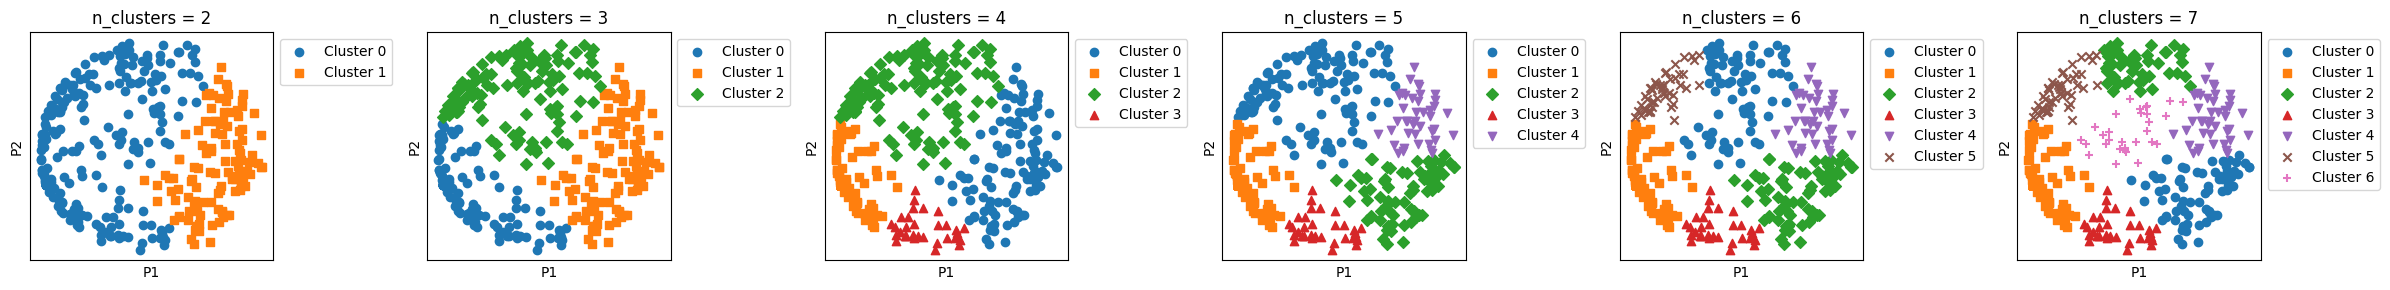

In [23]:
# Visualize clusters in 2D

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

n_clusters_range = range(2, 8)
fig, axes = plt.subplots(1, len(n_clusters_range), figsize=(24, 3))

markers = ['o', 's', 'D', '^', 'v', 'x', '+']

for i, n_clusters in enumerate(n_clusters_range):
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = ac.fit_predict(data_principal)

    # Create a scatter plot for each cluster
    for cluster in np.unique(clusters):
        axes[i].scatter(data_principal['P1'][clusters == cluster], 
                        data_principal['P2'][clusters == cluster], 
                        marker=markers[cluster], 
                        label=f'Cluster {cluster}')

    axes[i].set_title(f'n_clusters = {n_clusters}', fontsize=12)
    axes[i].set_xlabel('P1')
    axes[i].set_ylabel('P2')
    axes[i].set_xticks([])  
    axes[i].set_yticks([])  
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
#plt.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', label='Cluster Label')
plt.show()


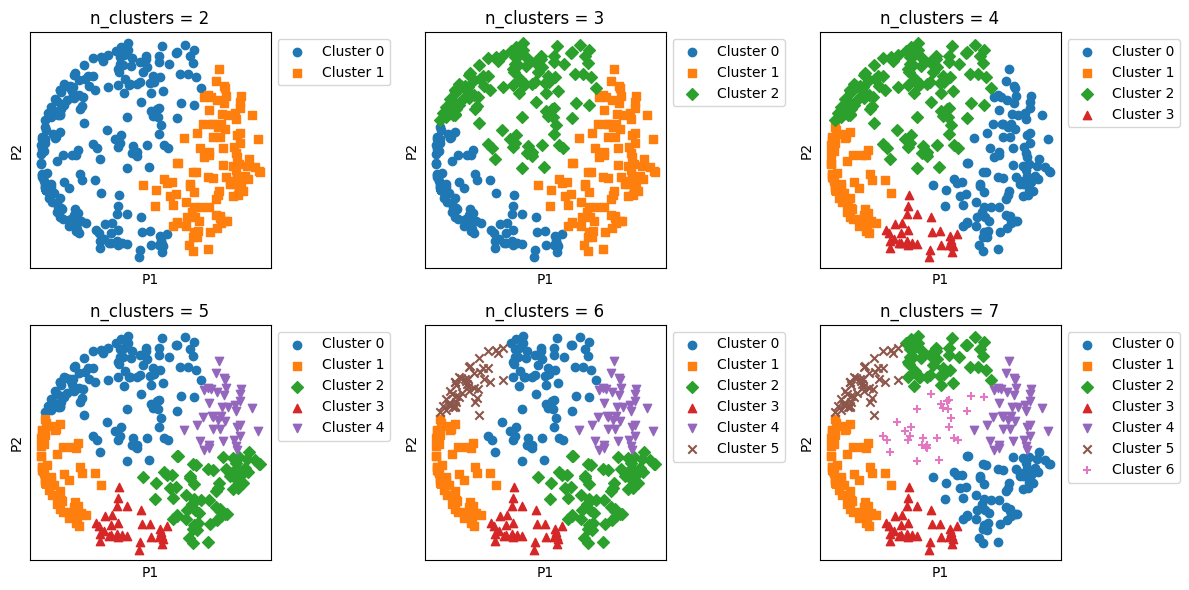

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

n_clusters_range = range(2, 8)
fig, axes = plt.subplots(2, 3, figsize=(12, 6)) 
axes = axes.flatten()

markers = ['o', 's', 'D', '^', 'v', 'x', '+']

for i, n_clusters in enumerate(n_clusters_range):
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = ac.fit_predict(data_principal)

    for cluster in np.unique(clusters):
        axes[i].scatter(data_principal['P1'][clusters == cluster], 
                        data_principal['P2'][clusters == cluster], 
                        marker=markers[cluster], 
                        label=f'Cluster {cluster}')

    axes[i].set_title(f'n_clusters = {n_clusters}', fontsize=12)
    axes[i].set_xlabel('P1')
    axes[i].set_ylabel('P2')
    axes[i].set_xticks([])  
    axes[i].set_yticks([])  
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))

for j in range(len(n_clusters_range), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


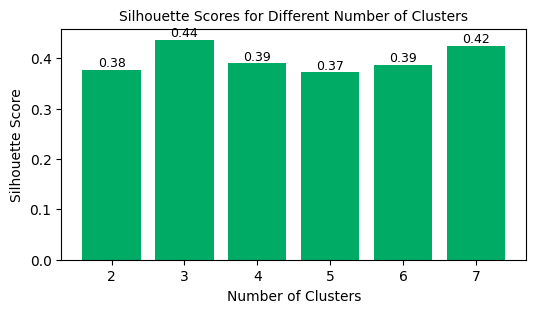

In [25]:
# Check optimum cluster using Silhouette Score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

k = [2, 3, 4, 5, 6, 7]
silhouette_scores = []

# Calculate silhouette scores
for n_clusters in k:
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = ac.fit_predict(data_principal)
    score = silhouette_score(data_principal, clusters)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(6, 3))
bars = plt.bar(k, silhouette_scores, color='#00AB66')

# Add silhouette score values on top of each bar
for bar, score in zip(bars, silhouette_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.0001, 
             f'{score:.2f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Number of Clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.title('Silhouette Scores for Different Number of Clusters', fontsize=10)

plt.show()

##### Load the students dataset to get the students' score

In [26]:
students_data = melted_df_sorted_reset[['Score']]
students_data.head()

,Score
0,99.0
1,99.0
2,100.0
3,100.0
4,98.0


In [27]:
pca_data = pd.concat([data_principal,students_data],axis=1)
pca_data.head()

,P1,P2,Score
0,0.505119,0.906111,99.0
1,0.364204,0.886849,99.0
2,0.205972,0.799179,100.0
3,0.430604,0.950259,100.0
4,-0.079855,0.652677,98.0


In [28]:
data

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546
4,16,67,172.734196,777,85,12,0,1,1,0,0,279
...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,0,0.000000,0,0,0,0,0,0,0,124,3194
348,19,115,1557.472438,0,0,0,0,4,0,1,2,402
349,28,65,2797.972734,0,0,0,0,2,1,1,149,3276
350,18,33,10770.620000,0,0,0,1,5,0,4,186,4146


In [29]:
from sklearn.preprocessing import OrdinalEncoder

df_cluster = data.copy()
encoder = OrdinalEncoder()
df_cluster = encoder.fit_transform(df_cluster)

In [30]:
agglomerative = AgglomerativeClustering(n_clusters = 3)
agglomerative.fit(df_cluster)
df_cluster = pd.DataFrame(df_cluster)
df_cluster['Cluster'] = agglomerative.labels_


In [31]:
df_cluster

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster
0,34.0,33.0,181.0,250.0,104.0,12.0,0.0,1.0,0.0,1.0,130.0,137.0,0
1,20.0,25.0,104.0,258.0,105.0,6.0,0.0,0.0,0.0,2.0,54.0,86.0,2
2,1.0,16.0,37.0,185.0,62.0,9.0,1.0,1.0,1.0,1.0,76.0,113.0,2
3,22.0,37.0,53.0,256.0,107.0,15.0,0.0,3.0,3.0,3.0,14.0,76.0,2
4,16.0,58.0,38.0,32.0,78.0,11.0,0.0,1.0,1.0,0.0,0.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,67.0,1
348,19.0,93.0,155.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,2.0,21.0,2
349,28.0,56.0,195.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,55.0,72.0,2
350,18.0,27.0,242.0,0.0,0.0,0.0,1.0,5.0,0.0,4.0,68.0,82.0,2


In [32]:
df_cluster = pd.concat([df_cluster,students_data],axis=1)
df_cluster.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster,Score
0,34.0,33.0,181.0,250.0,104.0,12.0,0.0,1.0,0.0,1.0,130.0,137.0,0,99.0
1,20.0,25.0,104.0,258.0,105.0,6.0,0.0,0.0,0.0,2.0,54.0,86.0,2,99.0
2,1.0,16.0,37.0,185.0,62.0,9.0,1.0,1.0,1.0,1.0,76.0,113.0,2,100.0
3,22.0,37.0,53.0,256.0,107.0,15.0,0.0,3.0,3.0,3.0,14.0,76.0,2,100.0
4,16.0,58.0,38.0,32.0,78.0,11.0,0.0,1.0,1.0,0.0,0.0,15.0,1,98.0


In [33]:
# Sort the DataFrame by the 'Cluster' 
df_cluster_sorted = df_cluster.sort_values(by='Cluster', ascending=True)
df_cluster_sorted.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster,Score
0,34.0,33.0,181.0,250.0,104.0,12.0,0.0,1.0,0.0,1.0,130.0,137.0,0,99.0
112,62.0,104.0,191.0,163.0,29.0,4.0,2.0,15.0,3.0,16.0,131.0,222.0,0,93.0
113,48.0,76.0,60.0,140.0,32.0,1.0,0.0,1.0,1.0,8.0,101.0,164.0,0,100.0
240,72.0,99.0,24.0,86.0,27.0,0.0,0.0,6.0,0.0,1.0,132.0,140.0,0,70.0
238,50.0,110.0,166.0,3.0,1.0,0.0,1.0,7.0,4.0,6.0,146.0,200.0,0,21.0


In [34]:
# Check cluster size
cluster_sizes = df_cluster['Cluster'].value_counts()
print(cluster_sizes)

Cluster
1    129
0    127
2     96
Name: count, dtype: int64


In [35]:
df_cluster2 = pd.concat([data, df_cluster['Cluster'],students_data],axis=1)
df_cluster2.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Cluster,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,0,99.0
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,2,99.0
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,2,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,2,100.0
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,1,98.0


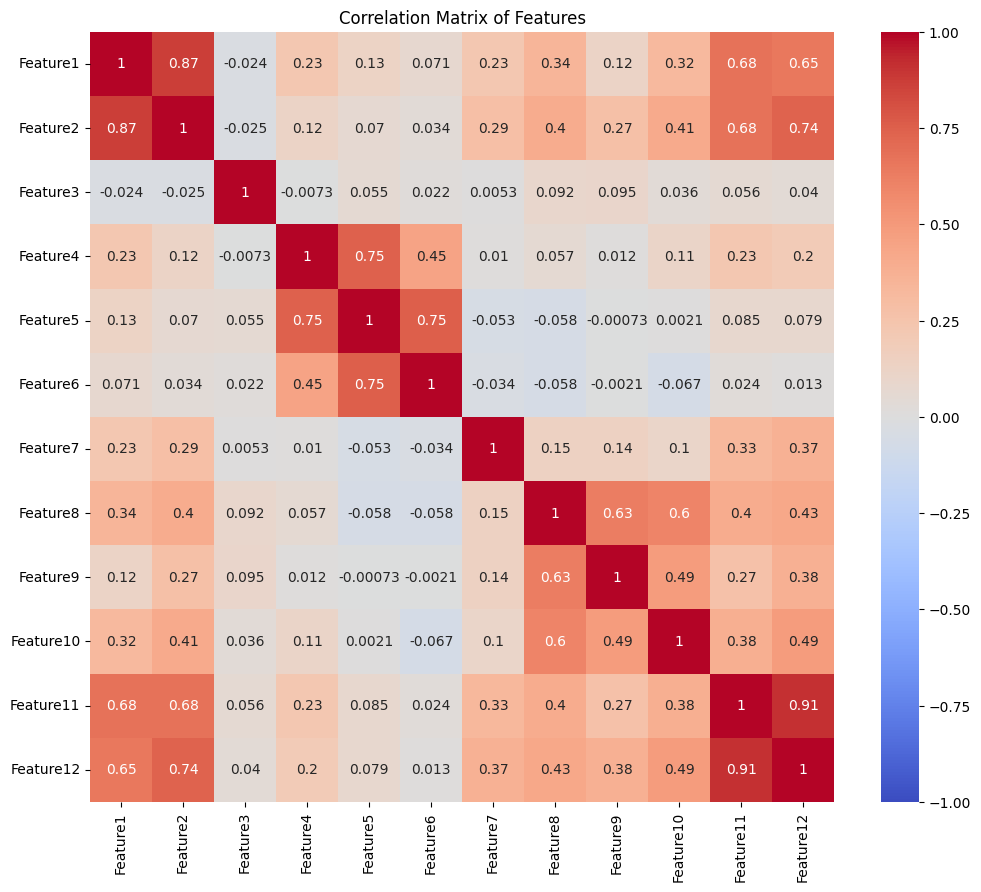

In [36]:
# Calculate the correlation matrix for the features in df_cluster
correlation_matrix = data.corr()
#print(correlation_matrix)

# Create a heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix of Features')
plt.show()

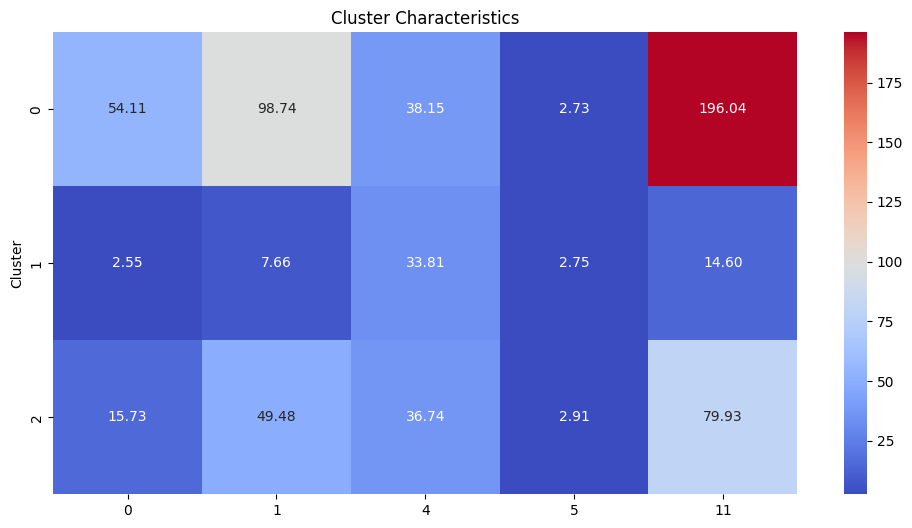

In [37]:
# Analyze Each Cluster (calculate the mean of each feature for each cluster)
#I choose 5 features to represent 

features = [0, 1, 4, 5, 11]
cluster_summary = df_cluster.groupby('Cluster')[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Characteristics')
plt.show()

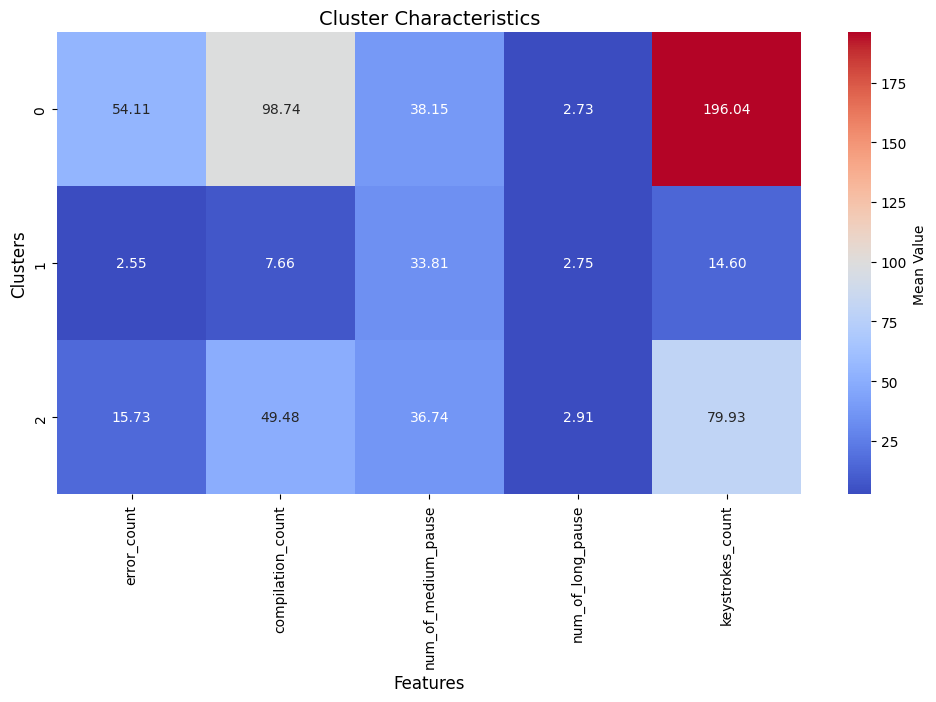

In [38]:
# Change the x-axis labels
features = [0, 1, 4, 5, 11]
custom_labels = ['error_count', 'compilation_count', 'num_of_medium_pause', 'num_of_long_pause', 'keystrokes_count']

cluster_summary = df_cluster.groupby('Cluster')[features].mean()
cluster_summary.columns = custom_labels

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Mean Value'})

plt.title('Cluster Characteristics', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.show()

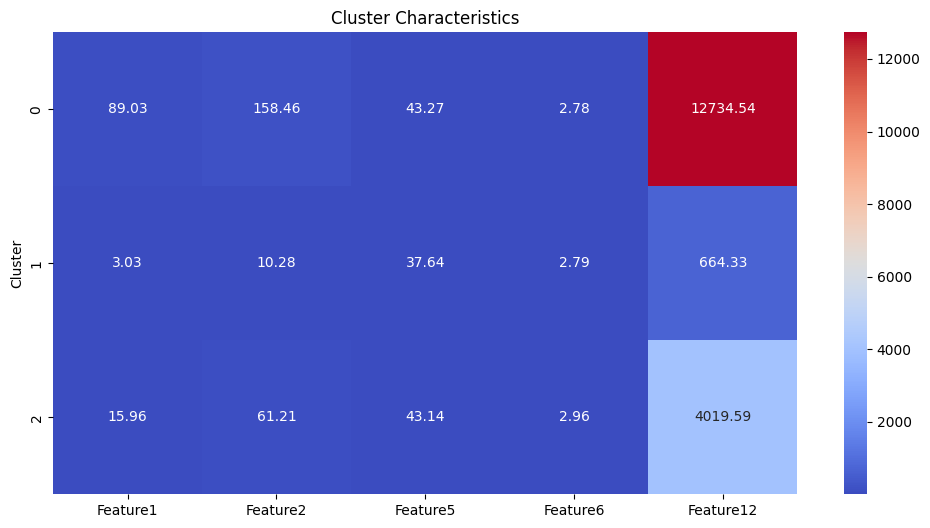

In [39]:
# Analyze Each Cluster (calculate the mean of each feature for each cluster)
#I choose 5 features to represent 

features = ['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']
cluster_summary = df_cluster2.groupby('Cluster')[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Characteristics')
plt.show()

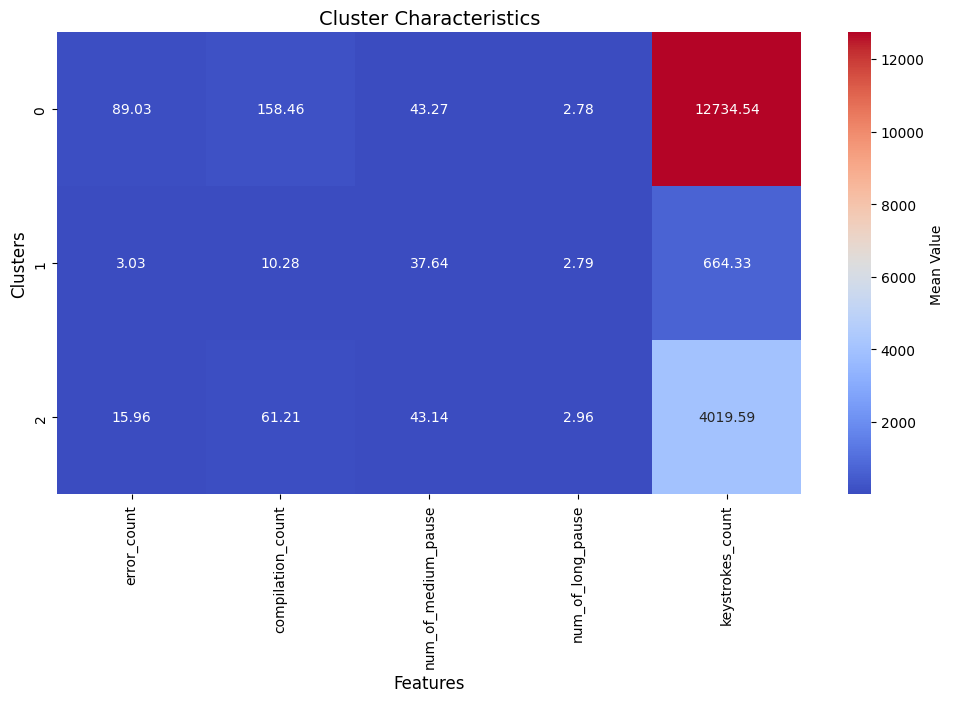

In [40]:
# Change the x-axis labels
features = ['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']
custom_labels = ['error_count', 'compilation_count', 'num_of_medium_pause', 'num_of_long_pause', 'keystrokes_count']

cluster_summary = df_cluster2.groupby('Cluster')[features].mean()
cluster_summary.columns = custom_labels

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Mean Value'})

plt.title('Cluster Characteristics', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.show()


In [41]:
# Get data-score
data_score = pd.concat([data,students_data],axis=1)
data_score.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,99.0
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,99.0
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,100.0
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,98.0


In [42]:
# Save or Analyze Specific Clusters
cluster_0_students = data_score[df_cluster['Cluster'] == 0]
cluster_0_students.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,99.0
16,46,75,128.630337,17680,70,3,0,5,0,2,413,8191,70.0
17,56,112,137.520666,13076,87,7,3,0,3,3,425,9966,88.0
19,13,106,891.676342,10358,99,1,1,4,2,2,251,10225,63.0
22,38,78,838.385428,10097,80,3,0,4,6,8,353,8755,20.0


In [43]:
cluster_1_students = data_score[df_cluster['Cluster'] == 1]
cluster_1_students.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,98.0
5,0,0,0.000000,5301,90,16,0,0,0,0,0,0,0.0
11,0,0,0.000000,13707,67,3,0,6,3,5,8,585,85.0
12,0,0,0.000000,234,55,3,0,3,2,1,1,207,88.0
13,0,1,0.000000,8789,56,2,0,4,1,3,27,1161,94.0


In [44]:
cluster_2_students = data_score[df_cluster['Cluster'] == 2]
cluster_2_students.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,99.0
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,100.0
6,13,14,329.232538,13734,115,11,1,1,0,0,158,3040,82.0
7,14,28,303.200518,5849,142,4,0,3,1,2,132,3250,86.0


In [45]:
#cluster_0_students.describe().round(2)
cluster_0_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,127.00,127.00,127.00,127.00,127.00
mean,89.03,158.46,43.27,2.78,12734.54
std,82.16,100.41,38.47,3.28,5186.78
min,1.00,25.00,0.00,0.00,5550.00
25%,32.00,79.50,0.50,0.00,9068.50
50%,55.00,129.00,40.00,2.00,11704.00
75%,139.50,219.00,70.00,4.00,14855.00
max,337.00,444.00,186.00,18.00,34619.00


In [46]:
#cluster_1_students.describe().round(2)
cluster_1_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,129.00,129.00,129.00,129.00,129.00
mean,3.03,10.28,37.64,2.79,664.33
std,13.37,32.37,33.66,3.01,1442.18
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,6.00,0.00,0.00
50%,0.00,0.00,33.00,2.00,0.00
75%,0.00,0.00,63.00,5.00,213.00
max,128.00,225.00,144.00,16.00,6652.00


In [47]:
#cluster_2_students.describe().round(2)
cluster_2_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,96.00,96.00,96.00,96.00,96.00
mean,15.96,61.21,43.14,2.96,4019.59
std,15.30,41.34,45.87,3.50,2633.43
min,0.00,0.00,0.00,0.00,115.00
25%,2.75,32.00,0.00,0.00,1774.00
50%,11.50,52.00,36.00,2.00,4112.00
75%,25.25,84.25,71.00,6.00,6299.75
max,76.00,207.00,256.00,17.00,10255.00


##### 2. Hierarchical (Agglomerative) Clustering with TSNE

Maximum distance: 221.79013222277558
Maximum Distance Difference: 74.95121589767439
Threshold Set At Distance: 146.8389163251012


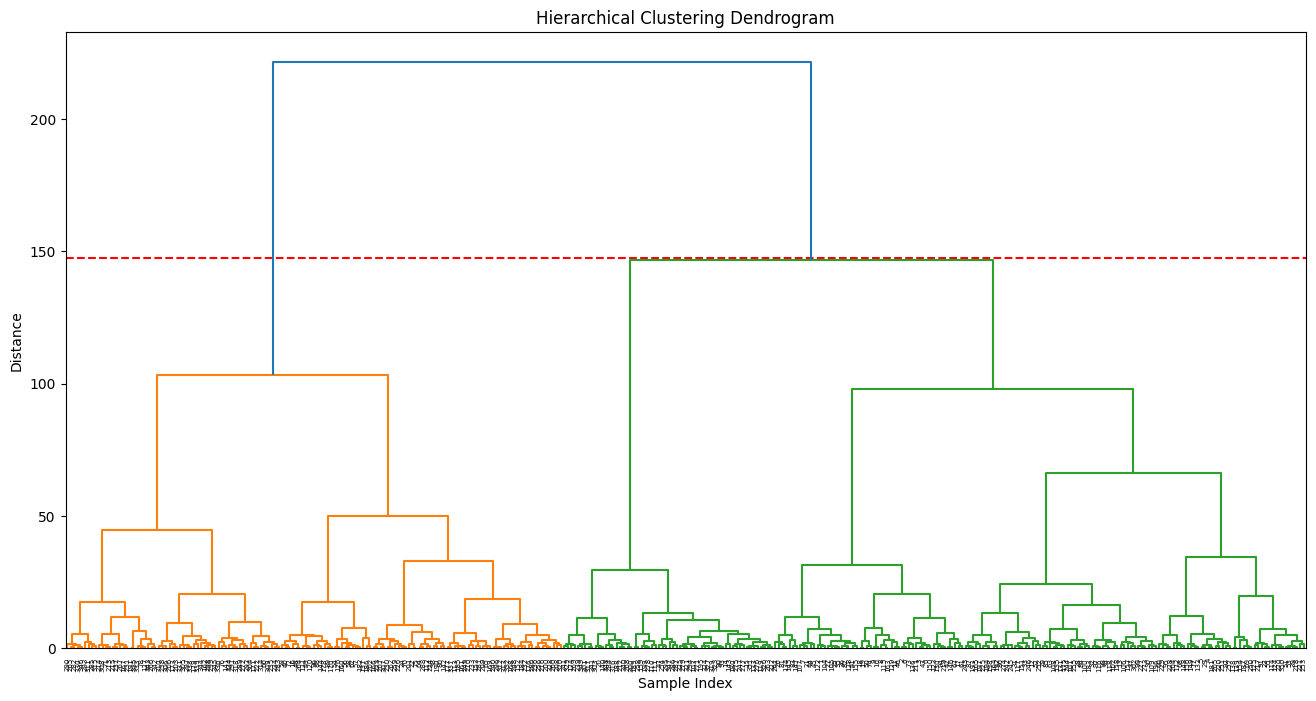

In [48]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

error_count_df = pd.read_csv('./features_results/errors_count.csv')
compilation_count_df = pd.read_csv('./features_results/compilation_count.csv')
compile_timediff_df = pd.read_csv('./features_results/compile_timediff_df2.csv')
#final_code_lines_df = pd.read_csv('./features_results/final_code_lines_count2.csv')
num_of_short_pause_df = pd.read_excel('./features_results/num_of_short_pauses.xlsx')
num_of_medium_pause_df = pd.read_excel('./features_results/num_of_medium_pauses.xlsx')
num_of_long_pause_df = pd.read_excel('./features_results/num_of_long_pauses.xlsx')
semicolon_key_df = pd.read_csv('./features_results/semicolon_key.csv')
print_key_df = pd.read_csv('./features_results/print_key_results.csv')
while_key_df = pd.read_csv('./features_results/while_key_results.csv')
for_key_df = pd.read_csv('./features_results/for_key_results.csv')
space_key_df = pd.read_csv('./features_results/space_key.csv')
keystrokes_count_df = pd.read_csv('./features_results/keystrokes_count.csv')
#assignment_score_df = pd.read_csv('./features_results/assignment_scores_2.csv')


error_count = error_count_df['Error_Count']
compilation_count = compilation_count_df['Compilation_Count']
compile_timediff = compile_timediff_df['MeanTimeDifferenceSeconds']
#final_code_lines_count = final_code_lines_df['Number of Lines']
num_of_short_pause = num_of_short_pause_df['NumOfShortPauses']
num_of_medium_pause = num_of_medium_pause_df['NumOfMediumPauses']
num_of_long_pause = num_of_long_pause_df['NumOfLongPauses']
semicolon_key = semicolon_key_df['Semicolon_Keys']
print_key = print_key_df['PrintCount']
while_key = while_key_df['WhileCount']
for_key = for_key_df['ForCount']
space_key = space_key_df['Space_Keys']
keystrokes_count = keystrokes_count_df['Count']
#assignment_score = assignment_score_df['Assignment_Score']


# Sample data
data = pd.DataFrame({
    'Feature1': error_count,
    'Feature2': compilation_count,
    'Feature3': compile_timediff,
    #'Feature14': final_code_lines_count,
    'Feature4': num_of_short_pause,
    'Feature5': num_of_medium_pause,
    'Feature6': num_of_long_pause,
    'Feature7': semicolon_key,
    'Feature8': print_key,
    'Feature9': while_key,
    'Feature10': for_key,
    'Feature11': space_key,
    'Feature12': keystrokes_count
    #'Feature13': assignment_score
})

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_normalized = normalize(data_scaled)
data_normalized = pd.DataFrame(data_normalized)

tsne = TSNE(n_components=2, random_state=42)  
data_tsne = tsne.fit_transform(data_normalized)
data_tsne = pd.DataFrame(data_tsne)
data_tsne.columns = ['T1', 'T2']  

linked = linkage(data_tsne, method='ward')

# Extract distances
distances = linked[:, 2]
max_distance = np.max(distances)
print("Maximum distance:", max_distance)

distance_differences = np.diff(distances)
max_distance_difference = np.max(distance_differences)
threshold_index = np.argmax(distance_differences)  
threshold = distances[threshold_index]  

print("Maximum Distance Difference:", max_distance_difference)
print("Threshold Set At Distance:", threshold)

plt.figure(figsize=(16, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Add the treshold line
plt.axhline(y=threshold+0.5, color='r', linestyle='--')

Dendrogram = shc.dendrogram(shc.linkage(data_tsne, method = 'ward'))

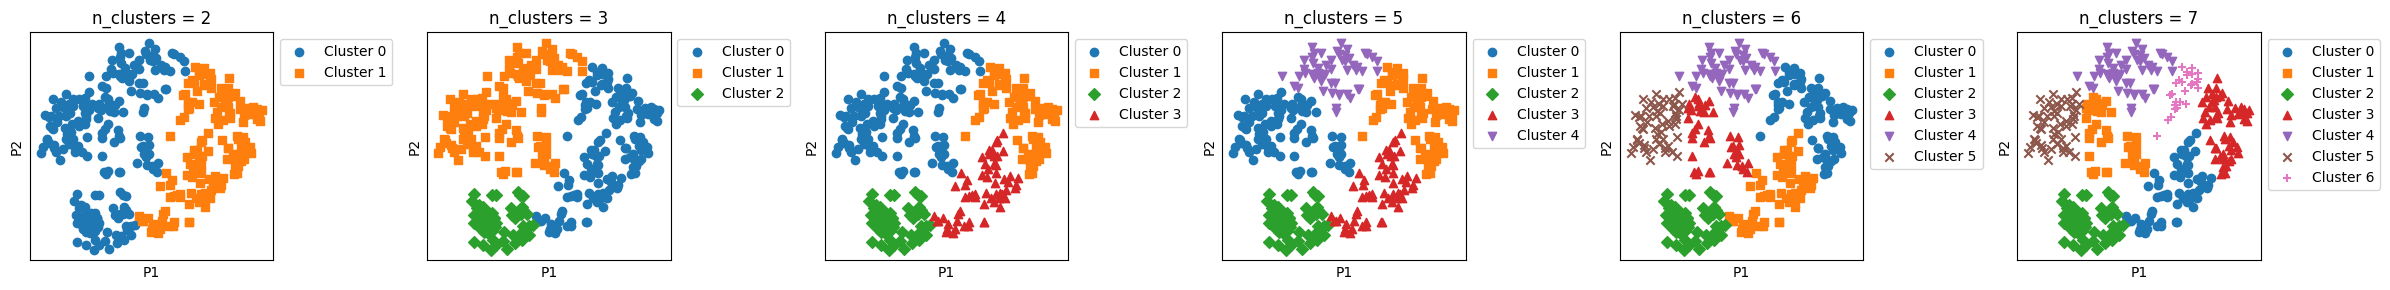

In [49]:
# Visualize clusters in 2D

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

n_clusters_range = range(2, 8)
fig, axes = plt.subplots(1, len(n_clusters_range), figsize=(24, 3))

markers = ['o', 's', 'D', '^', 'v', 'x', '+']

for i, n_clusters in enumerate(n_clusters_range):
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = ac.fit_predict(data_tsne)

    # Create a scatter plot for each cluster
    for cluster in np.unique(clusters):
        axes[i].scatter(data_tsne['T1'][clusters == cluster], 
                        data_tsne['T2'][clusters == cluster], 
                        marker=markers[cluster], 
                        label=f'Cluster {cluster}')

    axes[i].set_title(f'n_clusters = {n_clusters}', fontsize=12)
    axes[i].set_xlabel('P1')
    axes[i].set_ylabel('P2')
    axes[i].set_xticks([])  
    axes[i].set_yticks([])  
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
#plt.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', label='Cluster Label')
plt.show()


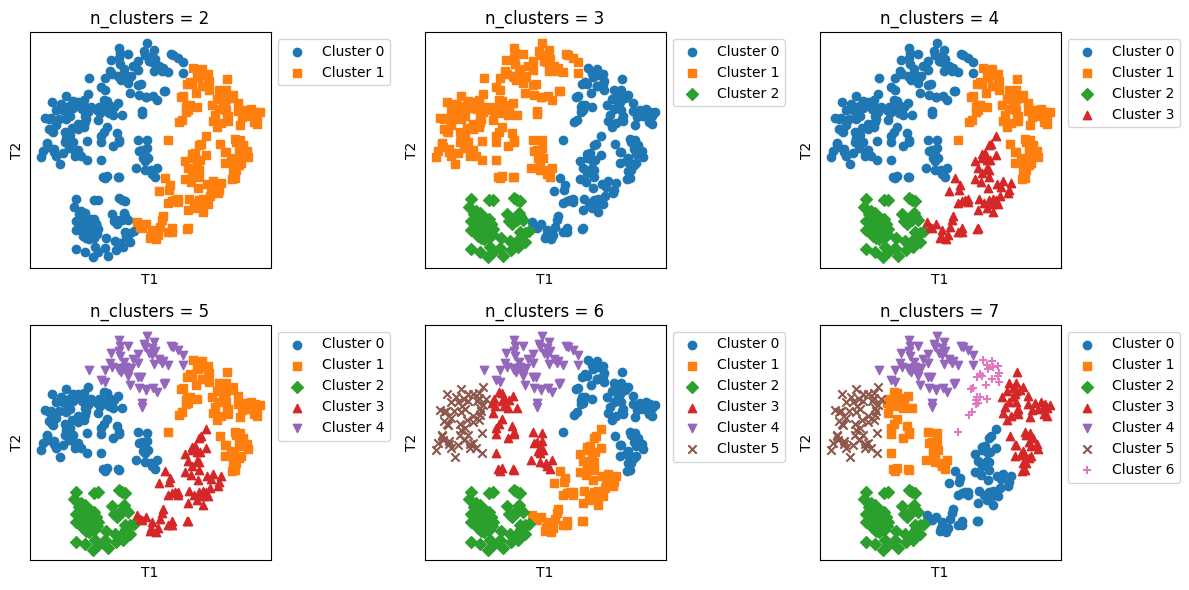

In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

n_clusters_range = range(2, 8)
fig, axes = plt.subplots(2, 3, figsize=(12, 6)) 
axes = axes.flatten()

markers = ['o', 's', 'D', '^', 'v', 'x', '+']

for i, n_clusters in enumerate(n_clusters_range):
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = ac.fit_predict(data_tsne)

    for cluster in np.unique(clusters):
        axes[i].scatter(data_tsne['T1'][clusters == cluster], 
                        data_tsne['T2'][clusters == cluster], 
                        marker=markers[cluster], 
                        label=f'Cluster {cluster}')

    axes[i].set_title(f'n_clusters = {n_clusters}', fontsize=12)
    axes[i].set_xlabel('T1')
    axes[i].set_ylabel('T2')
    axes[i].set_xticks([])  
    axes[i].set_yticks([])  
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))

for j in range(len(n_clusters_range), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


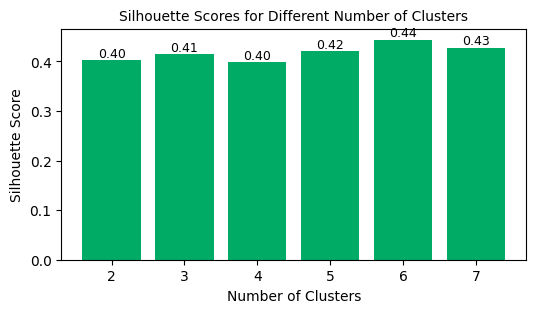

In [51]:
# Check optimum cluster using Silhouette Score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

k = [2, 3, 4, 5, 6, 7]
silhouette_scores = []

# Calculate silhouette scores
for n_clusters in k:
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = ac.fit_predict(data_tsne)
    score = silhouette_score(data_tsne, clusters)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(6, 3))
bars = plt.bar(k, silhouette_scores, color='#00AB66')

# Add silhouette score values on top of each bar
for bar, score in zip(bars, silhouette_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.0001, 
             f'{score:.2f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Number of Clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.title('Silhouette Scores for Different Number of Clusters', fontsize=10)

plt.show()

In [52]:
tsne_data = pd.concat([data_tsne,students_data],axis=1)
tsne_data.head()

,T1,T2,Score
0,1.173714,12.104099,99.0
1,-1.232418,10.081619,99.0
2,-0.183221,12.694817,100.0
3,0.647270,11.395861,100.0
4,-6.448457,4.831880,98.0


In [53]:
data

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546
4,16,67,172.734196,777,85,12,0,1,1,0,0,279
...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,0,0.000000,0,0,0,0,0,0,0,124,3194
348,19,115,1557.472438,0,0,0,0,4,0,1,2,402
349,28,65,2797.972734,0,0,0,0,2,1,1,149,3276
350,18,33,10770.620000,0,0,0,1,5,0,4,186,4146


In [54]:
from sklearn.preprocessing import OrdinalEncoder

df_cluster = data.copy()
encoder = OrdinalEncoder()
df_cluster = encoder.fit_transform(df_cluster)

In [55]:
agglomerative = AgglomerativeClustering(n_clusters = 6)
agglomerative.fit(df_cluster)
df_cluster = pd.DataFrame(df_cluster)
df_cluster['Cluster'] = agglomerative.labels_

In [56]:
df_cluster

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster
0,34.0,33.0,181.0,250.0,104.0,12.0,0.0,1.0,0.0,1.0,130.0,137.0,2
1,20.0,25.0,104.0,258.0,105.0,6.0,0.0,0.0,0.0,2.0,54.0,86.0,0
2,1.0,16.0,37.0,185.0,62.0,9.0,1.0,1.0,1.0,1.0,76.0,113.0,0
3,22.0,37.0,53.0,256.0,107.0,15.0,0.0,3.0,3.0,3.0,14.0,76.0,0
4,16.0,58.0,38.0,32.0,78.0,11.0,0.0,1.0,1.0,0.0,0.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,67.0,1
348,19.0,93.0,155.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,2.0,21.0,4
349,28.0,56.0,195.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,55.0,72.0,4
350,18.0,27.0,242.0,0.0,0.0,0.0,1.0,5.0,0.0,4.0,68.0,82.0,4


In [57]:
df_cluster = pd.concat([df_cluster,students_data],axis=1)
df_cluster.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster,Score
0,34.0,33.0,181.0,250.0,104.0,12.0,0.0,1.0,0.0,1.0,130.0,137.0,2,99.0
1,20.0,25.0,104.0,258.0,105.0,6.0,0.0,0.0,0.0,2.0,54.0,86.0,0,99.0
2,1.0,16.0,37.0,185.0,62.0,9.0,1.0,1.0,1.0,1.0,76.0,113.0,0,100.0
3,22.0,37.0,53.0,256.0,107.0,15.0,0.0,3.0,3.0,3.0,14.0,76.0,0,100.0
4,16.0,58.0,38.0,32.0,78.0,11.0,0.0,1.0,1.0,0.0,0.0,15.0,1,98.0


In [58]:
# Sort the DataFrame by the 'Cluster' 
df_cluster_sorted = df_cluster.sort_values(by='Cluster', ascending=True)
df_cluster_sorted.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster,Score
251,2.0,26.0,196.0,76.0,41.0,8.0,1.0,4.0,2.0,2.0,69.0,139.0,0,98.0
218,15.0,24.0,235.0,97.0,42.0,2.0,0.0,1.0,1.0,4.0,78.0,127.0,0,100.0
69,1.0,88.0,75.0,128.0,34.0,3.0,0.0,2.0,1.0,4.0,46.0,118.0,0,100.0
230,33.0,62.0,227.0,87.0,37.0,1.0,0.0,11.0,5.0,9.0,81.0,151.0,0,0.0
114,9.0,31.0,239.0,138.0,23.0,1.0,2.0,2.0,2.0,5.0,74.0,143.0,0,99.0


In [59]:
# Check cluster size
cluster_sizes = df_cluster['Cluster'].value_counts()
print(cluster_sizes)

Cluster
1    93
2    85
0    49
4    47
3    42
5    36
Name: count, dtype: int64


In [60]:
df_cluster2 = pd.concat([data, df_cluster['Cluster'],students_data],axis=1)
df_cluster2.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Cluster,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,2,99.0
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,0,99.0
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,0,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,0,100.0
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,1,98.0


In [62]:
""" # Calculate the correlation matrix for the features in df_cluster
correlation_matrix = df_cluster.corr()
#print(correlation_matrix)

# Create a heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix of Features')
plt.show() """

" # Calculate the correlation matrix for the features in df_cluster\ncorrelation_matrix = df_cluster.corr()\n#print(correlation_matrix)\n\n# Create a heatmap \nplt.figure(figsize=(12, 10))\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)\n\nplt.title('Correlation Matrix of Features')\nplt.show() "

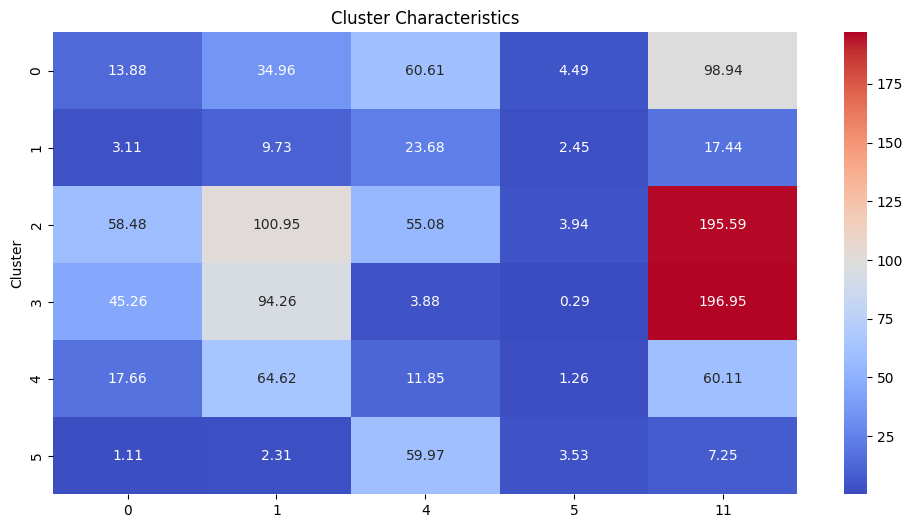

In [61]:
# Analyze Each Cluster (calculate the mean of each feature for each cluster)
#I choose 5 features to represent students' profile

features = [0, 1, 4, 5, 11]
cluster_summary = df_cluster.groupby('Cluster')[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Characteristics')
plt.show()

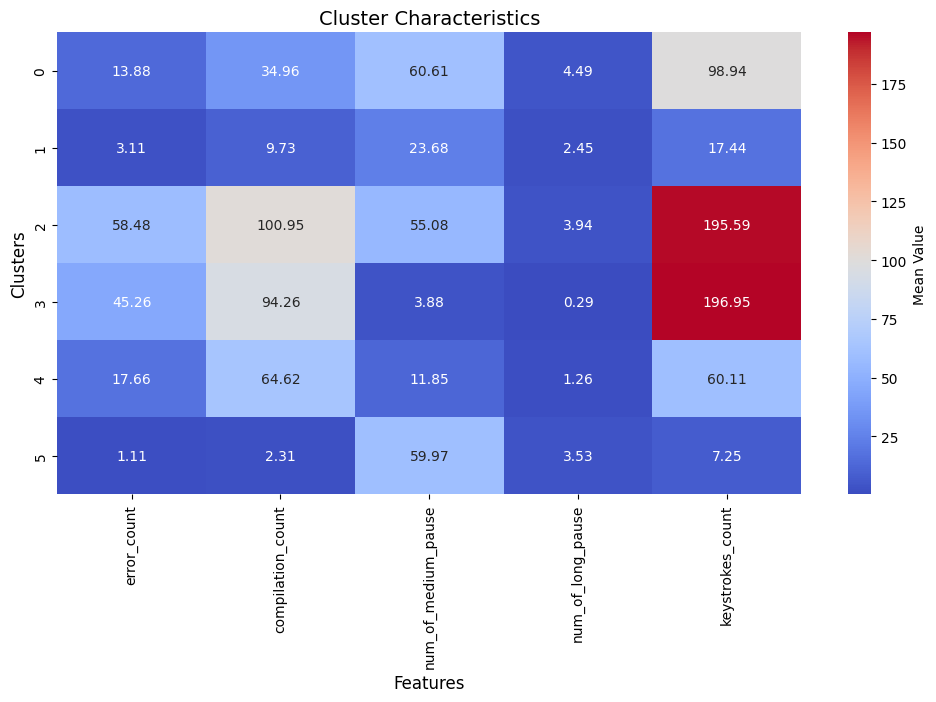

In [62]:
# Change the x-axis labels
features = [0, 1, 4, 5, 11]
custom_labels = ['error_count', 'compilation_count', 'num_of_medium_pause', 'num_of_long_pause', 'keystrokes_count']

cluster_summary = df_cluster.groupby('Cluster')[features].mean()
cluster_summary.columns = custom_labels

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Mean Value'})

plt.title('Cluster Characteristics', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.show()

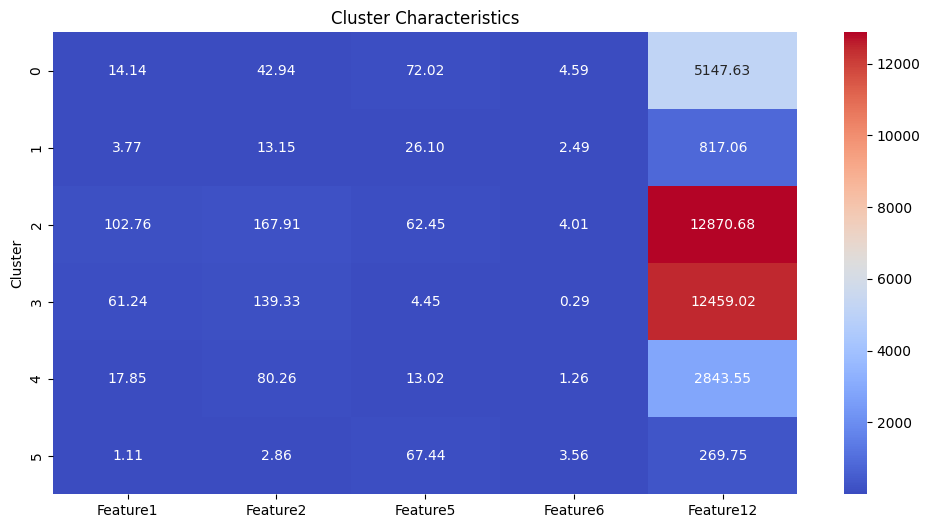

In [63]:
# Analyze Each Cluster (calculate the mean of each feature for each cluster)
#I choose 5 features to represent 

features = ['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']
cluster_summary = df_cluster2.groupby('Cluster')[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Characteristics')
plt.show()

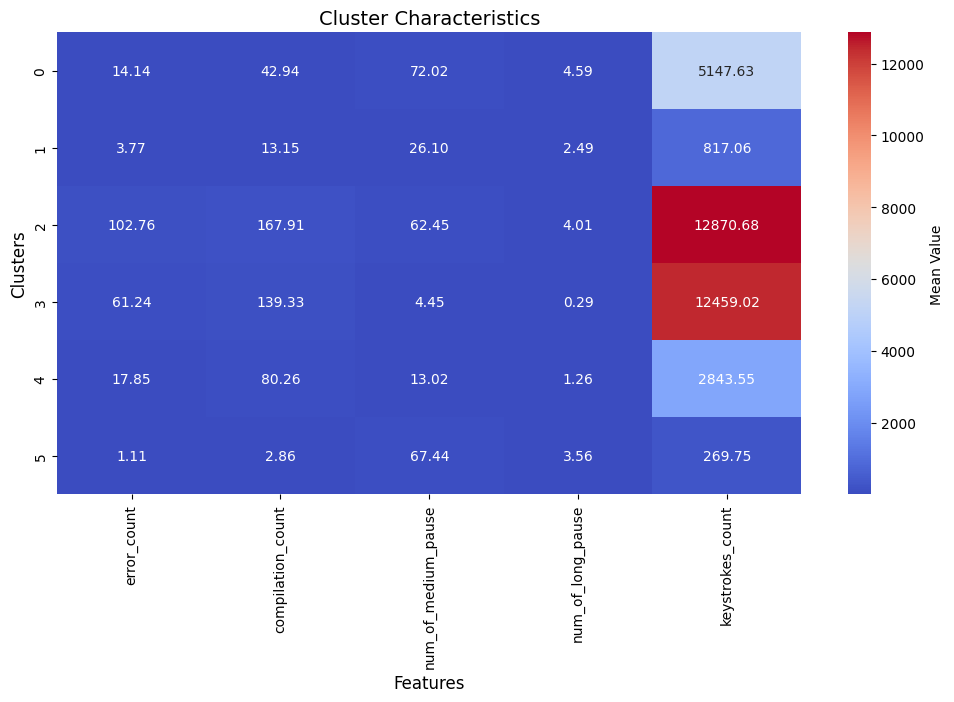

In [64]:
# Change the x-axis labels
features = ['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']
custom_labels = ['error_count', 'compilation_count', 'num_of_medium_pause', 'num_of_long_pause', 'keystrokes_count']

cluster_summary = df_cluster2.groupby('Cluster')[features].mean()
cluster_summary.columns = custom_labels

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Mean Value'})

plt.title('Cluster Characteristics', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.show()


In [65]:
# Get data-score
data_score = pd.concat([data,students_data],axis=1)
data_score.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,99.0
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,99.0
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,100.0
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,98.0


In [66]:
# Save or Analyze Specific Clusters
cluster_0_students = data_score[df_cluster['Cluster'] == 0]
cluster_0_students.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,99.0
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,100.0
6,13,14,329.232538,13734,115,11,1,1,0,0,158,3040,82.0
7,14,28,303.200518,5849,142,4,0,3,1,2,132,3250,86.0


In [67]:
# Save or Analyze Specific Clusters
cluster_1_students = data_score[df_cluster['Cluster'] == 1]
cluster_1_students.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,98.0
5,0,0,0.000000,5301,90,16,0,0,0,0,0,0,0.0
12,0,0,0.000000,234,55,3,0,3,2,1,1,207,88.0
14,0,0,0.000000,3589,6,0,0,3,0,1,38,732,100.0
15,0,0,0.000000,0,0,0,0,0,0,0,0,0,0.0


In [68]:
# Save or Analyze Specific Clusters
cluster_2_students = data_score[df_cluster['Cluster'] == 2]
cluster_2_students.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,99.0
16,46,75,128.630337,17680,70,3,0,5,0,2,413,8191,70.0
17,56,112,137.520666,13076,87,7,3,0,3,3,425,9966,88.0
19,13,106,891.676342,10358,99,1,1,4,2,2,251,10225,63.0
22,38,78,838.385428,10097,80,3,0,4,6,8,353,8755,20.0


In [69]:
# Save or Analyze Specific Clusters
cluster_3_students = data_score[df_cluster['Cluster'] == 3]
cluster_3_students.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
76,19,98,414.806608,121,27,4,1,1,1,0,430,11164,92.0
78,27,60,223.654644,0,0,0,0,8,1,7,379,8374,78.0
127,8,61,4148.771033,0,0,0,0,6,1,5,421,7818,0.0
166,45,78,3583.881428,7,0,0,0,13,9,13,410,10342,89.0
177,106,165,249.594097,0,0,0,0,0,0,13,263,7957,99.0


In [70]:
# Save or Analyze Specific Clusters
cluster_4_students = data_score[df_cluster['Cluster'] == 4]
cluster_4_students.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
20,7,143,581.347915,1556,44,2,0,1,1,0,0,325,86.0
52,39,59,1246.443482,181,32,3,0,2,1,1,8,264,83.0
68,1,114,968.946646,2360,32,6,0,2,1,0,0,481,91.0
71,4,55,3309.517037,0,0,0,0,5,2,3,30,1003,0.0
92,40,83,2207.919256,2767,70,8,1,1,1,0,69,2955,4.0


In [71]:
# Save or Analyze Specific Clusters
cluster_5_students = data_score[df_cluster['Cluster'] == 5]
cluster_5_students.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
11,0,0,0.0,13707,67,3,0,6,3,5,8,585,85.0
13,0,1,0.0,8789,56,2,0,4,1,3,27,1161,94.0
25,0,0,0.0,19235,88,3,0,0,0,0,0,0,87.5
26,0,0,0.0,9669,81,5,0,0,0,0,0,0,96.0
27,0,0,0.0,25792,116,5,0,0,0,0,0,0,95.0


In [72]:
#cluster_0_students.describe().round(2)
cluster_0_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,49.00,49.00,49.00,49.00,49.00
mean,14.14,42.94,72.02,4.59,5147.63
std,14.99,34.01,43.18,3.60,2303.38
min,0.00,0.00,17.00,0.00,418.00
25%,2.00,17.00,45.00,2.00,3478.00
50%,9.00,36.00,65.00,4.00,5426.00
75%,23.00,52.00,90.00,7.00,6856.00
max,76.00,138.00,256.00,17.00,10255.00


In [73]:
#cluster_1_students.describe().round(2)
cluster_1_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,93.00,93.00,93.00,93.00,93.00
mean,3.77,13.15,26.10,2.49,817.06
std,15.47,37.26,27.28,3.12,1620.83
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,19.00,1.00,0.00
75%,0.00,0.00,44.00,4.00,281.00
max,128.00,225.00,100.00,16.00,6652.00


In [74]:
#cluster_2_students.describe().round(2)
cluster_2_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,85.00,85.00,85.00,85.00,85.00
mean,102.76,167.91,62.45,4.01,12870.68
std,89.78,109.59,32.40,3.32,5568.92
min,1.00,25.00,10.00,0.00,5550.00
25%,34.00,82.00,40.00,2.00,9087.00
50%,69.00,134.00,57.00,3.00,11607.00
75%,149.00,226.00,82.00,6.00,14737.00
max,337.00,444.00,186.00,18.00,34619.00


In [75]:
#cluster_3_students.describe().round(2)
cluster_3_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,42.00,42.00,42.00,42.00,42.00
mean,61.24,139.33,4.45,0.29,12459.02
std,55.19,76.29,9.58,0.92,4361.38
min,2.00,48.00,0.00,0.00,6255.00
25%,26.25,75.75,0.00,0.00,9072.50
50%,42.50,117.50,0.00,0.00,11781.00
75%,71.25,206.25,0.00,0.00,14873.50
max,208.00,369.00,30.00,4.00,26965.00


In [76]:
#cluster_4students.describe().round(2)
cluster_4_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,47.00,47.00,47.00,47.00,47.00
mean,17.85,80.26,13.02,1.26,2843.55
std,15.56,39.95,24.19,2.44,2453.04
min,0.00,20.00,0.00,0.00,115.00
25%,5.00,52.50,0.00,0.00,464.50
50%,16.00,74.00,0.00,0.00,2229.00
75%,28.00,98.00,17.00,1.50,4702.50
max,68.00,207.00,82.00,8.00,8232.00


In [77]:
#cluster_5_students.describe().round(2)
cluster_5_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,36.00,36.00,36.00,36.00,36.00
mean,1.11,2.86,67.44,3.56,269.75
std,4.38,10.15,30.32,2.59,691.96
min,0.00,0.00,18.00,0.00,0.00
25%,0.00,0.00,38.75,2.00,0.00
50%,0.00,0.00,66.50,3.00,0.00
75%,0.00,0.00,82.00,5.00,0.00
max,25.00,47.00,144.00,11.00,2648.00


##### 3. K-Means Clustering with PCA

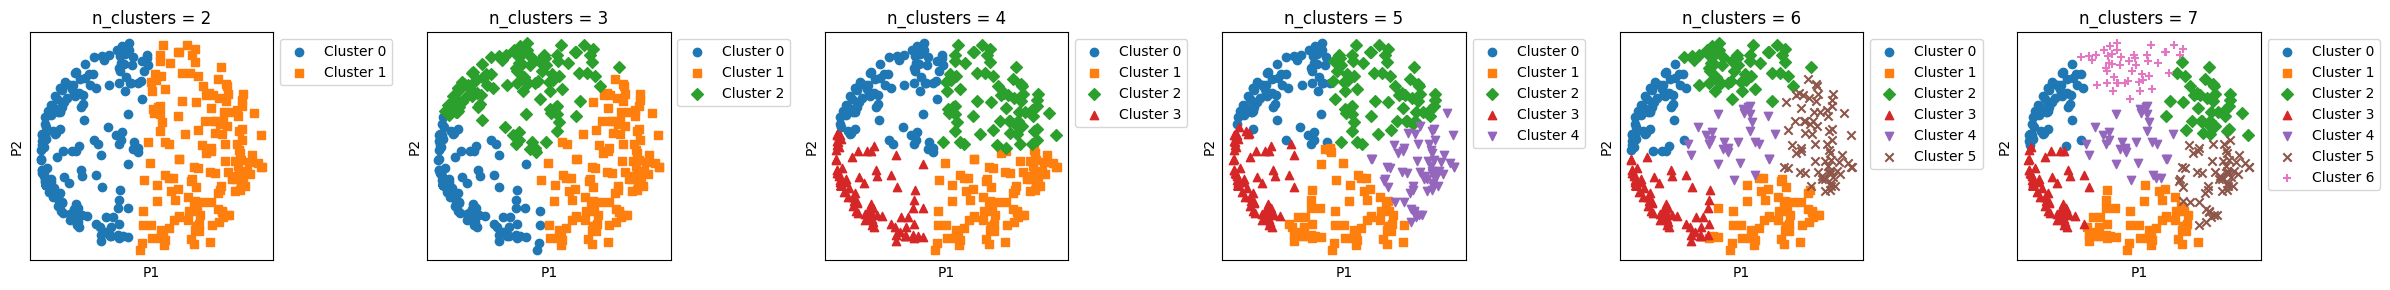

In [78]:
# K-Means with PCA
from sklearn.cluster import KMeans

n_clusters_range = range(2, 8) 
fig, axes = plt.subplots(1, len(n_clusters_range), figsize=(24, 3))

markers = ['o', 's', 'D', '^', 'v', 'x', '+'] 

for i, n_clusters in enumerate(n_clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    clusters = kmeans.fit_predict(data_principal) 

    for cluster in np.unique(clusters):
        axes[i].scatter(data_principal['P1'][clusters == cluster], 
                        data_principal['P2'][clusters == cluster], 
                        marker=markers[cluster],  
                        label=f'Cluster {cluster}')

    axes[i].set_title(f'n_clusters = {n_clusters}', fontsize=12)
    axes[i].set_xlabel('P1')
    axes[i].set_ylabel('P2')
    axes[i].set_xticks([])  
    axes[i].set_yticks([])  
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  

plt.tight_layout()
plt.show()


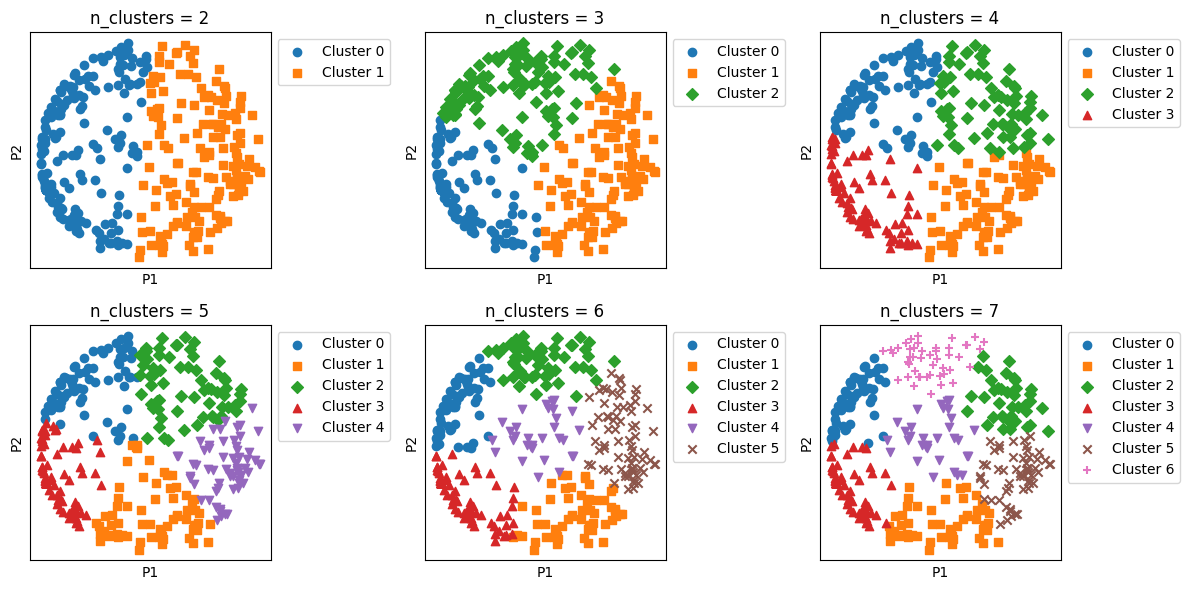

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

n_clusters_range = range(2, 8)  
fig, axes = plt.subplots(2, 3, figsize=(12, 6)) 
axes = axes.flatten()

markers = ['o', 's', 'D', '^', 'v', 'x', '+']

for i, n_clusters in enumerate(n_clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_principal)

    for cluster in np.unique(clusters):
        axes[i].scatter(data_principal['P1'][clusters == cluster], 
                        data_principal['P2'][clusters == cluster], 
                        marker=markers[cluster],  
                        label=f'Cluster {cluster}')

    axes[i].set_title(f'n_clusters = {n_clusters}', fontsize=12)
    axes[i].set_xlabel('P1')
    axes[i].set_ylabel('P2')
    axes[i].set_xticks([])  
    axes[i].set_yticks([])  
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1)) 

for j in range(len(n_clusters_range), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


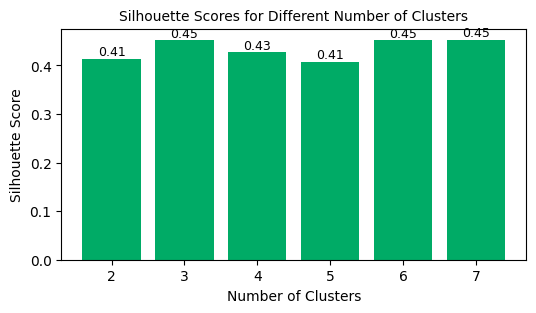

In [80]:
# Check optimum cluster number with Silhouette Score
from sklearn.metrics import silhouette_score

k = [2, 3, 4, 5, 6, 7]
silhouette_scores = []

for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  
    clusters = kmeans.fit_predict(data_principal)  
    score = silhouette_score(data_principal, clusters)  
    silhouette_scores.append(score)

plt.figure(figsize=(6, 3))
bars = plt.bar(k, silhouette_scores, color='#00AB66')

for bar, score in zip(bars, silhouette_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.0001, 
             f'{score:.2f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Number of Clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.title('Silhouette Scores for Different Number of Clusters', fontsize=10)
plt.show()


In [81]:
pca_data = pd.concat([data_principal,students_data],axis=1)
pca_data.head()

,P1,P2,Score
0,0.505119,0.906111,99.0
1,0.364204,0.886849,99.0
2,0.205972,0.799179,100.0
3,0.430604,0.950259,100.0
4,-0.079855,0.652677,98.0


In [82]:
data

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546
4,16,67,172.734196,777,85,12,0,1,1,0,0,279
...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,0,0.000000,0,0,0,0,0,0,0,124,3194
348,19,115,1557.472438,0,0,0,0,4,0,1,2,402
349,28,65,2797.972734,0,0,0,0,2,1,1,149,3276
350,18,33,10770.620000,0,0,0,1,5,0,4,186,4146


In [83]:
from sklearn.preprocessing import OrdinalEncoder

df_cluster = data.copy()
encoder = OrdinalEncoder()
df_cluster = encoder.fit_transform(df_cluster)

In [84]:
df_cluster = pd.DataFrame(df_cluster)
df_cluster_numeric = df_cluster.select_dtypes(include=[float, int])
df_cluster_clean = df_cluster_numeric.fillna(df_cluster_numeric.mean())

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster_clean['Cluster'] = kmeans.fit_predict(df_cluster_clean)
df_cluster_clean.head()


,0,1,2,3,4,5,6,7,8,9,10,11,Cluster
0,34.0,33.0,181.0,250.0,104.0,12.0,0.0,1.0,0.0,1.0,130.0,137.0,1
1,20.0,25.0,104.0,258.0,105.0,6.0,0.0,0.0,0.0,2.0,54.0,86.0,1
2,1.0,16.0,37.0,185.0,62.0,9.0,1.0,1.0,1.0,1.0,76.0,113.0,0
3,22.0,37.0,53.0,256.0,107.0,15.0,0.0,3.0,3.0,3.0,14.0,76.0,0
4,16.0,58.0,38.0,32.0,78.0,11.0,0.0,1.0,1.0,0.0,0.0,15.0,0


In [85]:
df_cluster = pd.concat([df_cluster,students_data],axis=1)
df_cluster.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Score
0,34.0,33.0,181.0,250.0,104.0,12.0,0.0,1.0,0.0,1.0,130.0,137.0,99.0
1,20.0,25.0,104.0,258.0,105.0,6.0,0.0,0.0,0.0,2.0,54.0,86.0,99.0
2,1.0,16.0,37.0,185.0,62.0,9.0,1.0,1.0,1.0,1.0,76.0,113.0,100.0
3,22.0,37.0,53.0,256.0,107.0,15.0,0.0,3.0,3.0,3.0,14.0,76.0,100.0
4,16.0,58.0,38.0,32.0,78.0,11.0,0.0,1.0,1.0,0.0,0.0,15.0,98.0


In [86]:
# Sort the DataFrame by the 'Cluster' 
df_cluster_sorted = df_cluster_clean.sort_values(by='Cluster', ascending=True)
df_cluster_sorted.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster
175,0.0,0.0,0.0,70.0,88.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0
142,2.0,4.0,22.0,193.0,27.0,2.0,0.0,22.0,2.0,24.0,0.0,32.0,0
143,1.0,1.0,0.0,39.0,11.0,2.0,0.0,3.0,1.0,3.0,0.0,4.0,0
145,15.0,30.0,32.0,143.0,44.0,4.0,0.0,0.0,0.0,3.0,69.0,107.0,0
147,0.0,0.0,0.0,171.0,66.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [87]:
# Check cluster size
cluster_sizes = df_cluster_sorted['Cluster'].value_counts()
print(cluster_sizes)

Cluster
0    141
2    109
1    102
Name: count, dtype: int64


In [88]:
df_cluster2 = pd.concat([data, df_cluster_clean['Cluster'],students_data],axis=1)
df_cluster2.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Cluster,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,1,99.0
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,1,99.0
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,0,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,0,100.0
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,0,98.0


In [84]:
""" # Calculate the correlation matrix for the features in df_cluster
correlation_matrix = df_cluster.corr()
#print(correlation_matrix)

# Create a heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix of Features')
plt.show() """

" # Calculate the correlation matrix for the features in df_cluster\ncorrelation_matrix = df_cluster.corr()\n#print(correlation_matrix)\n\n# Create a heatmap \nplt.figure(figsize=(12, 10))\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)\n\nplt.title('Correlation Matrix of Features')\nplt.show() "

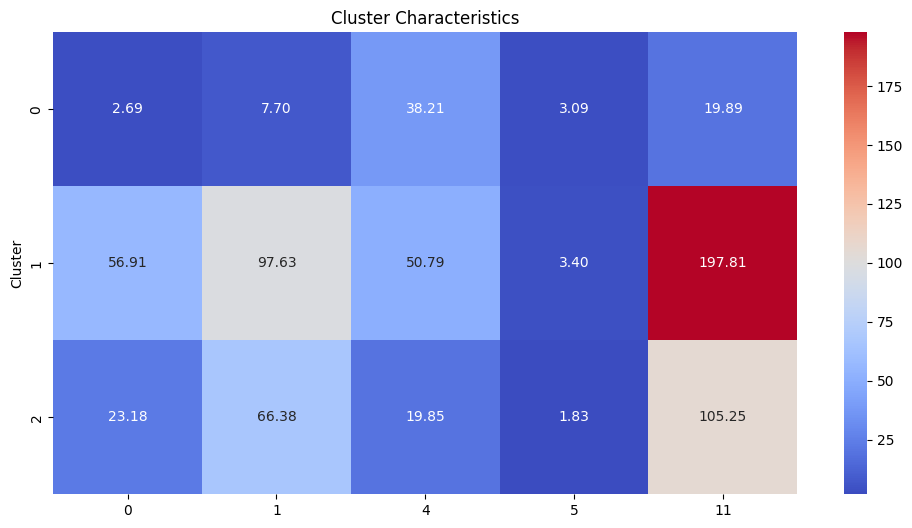

In [89]:
# Analyze Each Cluster (calculate the mean of each feature for each cluster)
#I choose 5 features to represent students' profile

features = [0, 1, 4, 5, 11]
cluster_summary = df_cluster_sorted.groupby('Cluster')[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Characteristics')
plt.show()

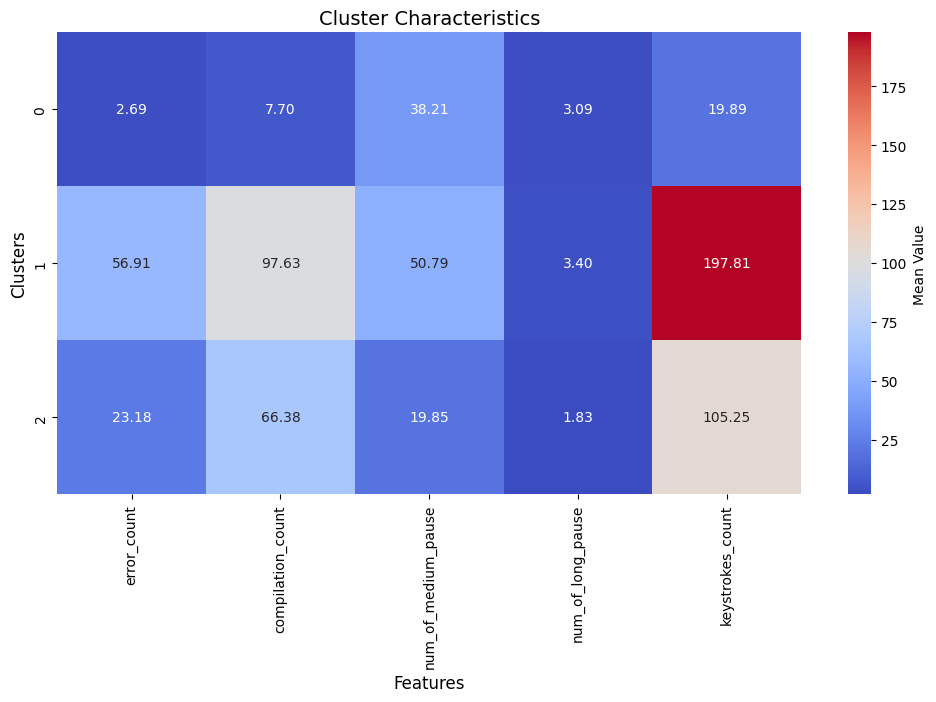

In [90]:
# Change the x-axis labels
features = [0, 1, 4, 5, 11]
custom_labels = ['error_count', 'compilation_count', 'num_of_medium_pause', 'num_of_long_pause', 'keystrokes_count']

cluster_summary = df_cluster_sorted.groupby('Cluster')[features].mean()
cluster_summary.columns = custom_labels

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Mean Value'})

plt.title('Cluster Characteristics', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.show()

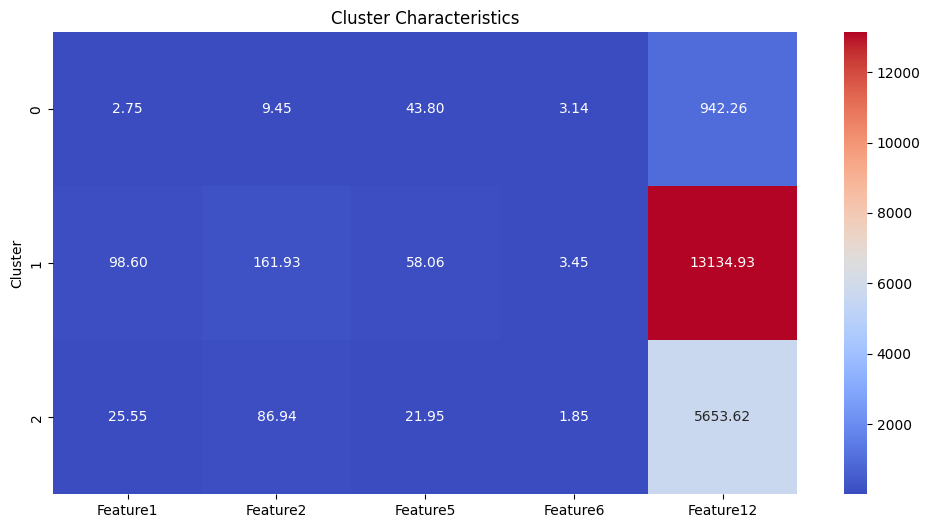

In [91]:
# Analyze Each Cluster (calculate the mean of each feature for each cluster)
#I choose 5 features to represent 

features = ['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']
cluster_summary = df_cluster2.groupby('Cluster')[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Characteristics')
plt.show()

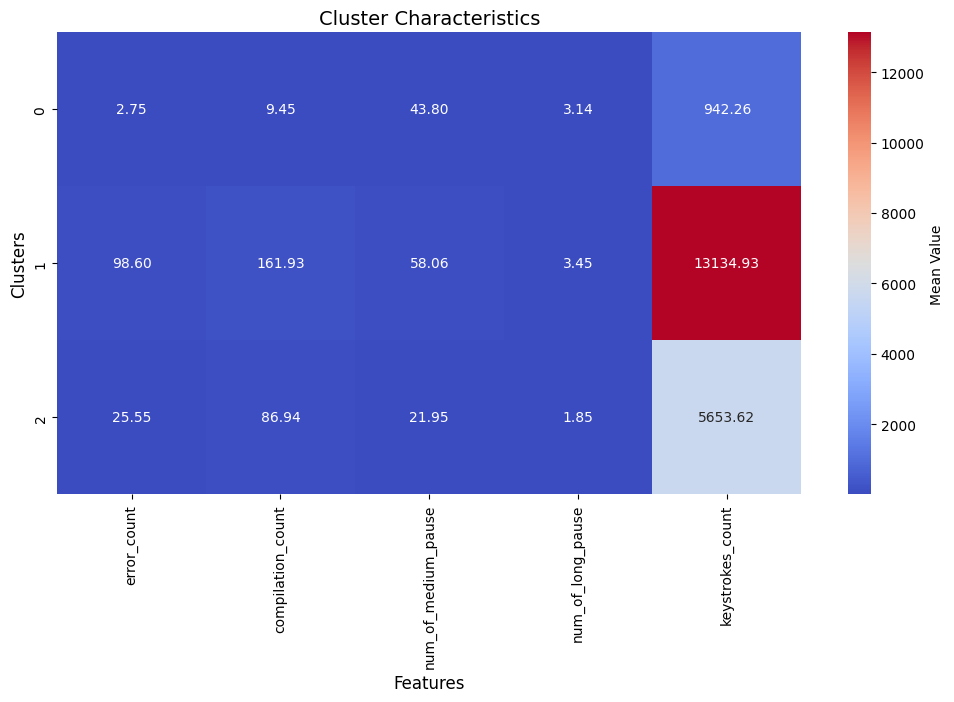

In [92]:
# Change the x-axis labels
features = ['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']
custom_labels = ['error_count', 'compilation_count', 'num_of_medium_pause', 'num_of_long_pause', 'keystrokes_count']

cluster_summary = df_cluster2.groupby('Cluster')[features].mean()
cluster_summary.columns = custom_labels

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Mean Value'})

plt.title('Cluster Characteristics', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.show()


In [93]:
# Get data-score
data_score = pd.concat([data,students_data],axis=1)
data_score.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,99.0
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,99.0
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,100.0
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,98.0


In [94]:
# Save or Analyze Specific Clusters
cluster_0_students = data_score[df_cluster_sorted['Cluster'] == 0]
cluster_0_students.head()

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_41088/1694170263.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_0_students = data_score[df_cluster_sorted['Cluster'] == 0]


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,100.0
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,98.0
5,0,0,0.000000,5301,90,16,0,0,0,0,0,0,0.0
6,13,14,329.232538,13734,115,11,1,1,0,0,158,3040,82.0


In [95]:
# Save or Analyze Specific Clusters
cluster_1_students = data_score[df_cluster_sorted['Cluster'] == 1]
cluster_1_students.head()

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_41088/445141314.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_1_students = data_score[df_cluster_sorted['Cluster'] == 1]


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,99.0
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,99.0
16,46,75,128.630337,17680,70,3,0,5,0,2,413,8191,70.0
17,56,112,137.520666,13076,87,7,3,0,3,3,425,9966,88.0
18,2,11,280.508500,13375,97,1,2,1,1,2,259,10255,45.0


In [96]:
# Save or Analyze Specific Clusters
cluster_2_students = data_score[df_cluster_sorted['Cluster'] == 2]
cluster_2_students.head()

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_41088/1313934696.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_2_students = data_score[df_cluster_sorted['Cluster'] == 2]


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
20,7,143,581.347915,1556,44,2,0,1,1,0,0,325,86.0
21,0,102,728.258217,7594,90,3,0,3,1,3,79,4730,97.0
23,2,4,23138.576330,6106,86,11,0,4,1,2,30,574,88.0
39,7,8,63088.609430,8211,109,5,0,4,2,4,118,2066,95.0
44,2,52,1296.161705,6655,120,7,0,2,1,6,101,4626,0.0


In [97]:
#cluster_0_students.describe().round(2)
cluster_0_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,141.00,141.00,141.00,141.00,141.00
mean,2.75,9.45,43.80,3.14,942.26
std,8.54,21.66,39.81,3.34,1839.18
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,10.00,0.00,0.00
50%,0.00,0.00,37.00,3.00,0.00
75%,0.00,6.00,66.00,5.00,585.00
max,64.00,126.00,256.00,17.00,7421.00


In [98]:
#cluster_1_students.describe().round(2)
cluster_1_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,102.00,102.00,102.00,102.00,102.00
mean,98.60,161.93,58.06,3.45,13134.93
std,87.39,108.84,36.89,3.24,5594.21
min,0.00,0.00,0.00,0.00,4467.00
25%,31.50,78.00,33.25,1.00,9159.25
50%,66.50,137.00,55.50,3.00,12170.00
75%,148.50,225.00,80.00,5.00,15804.00
max,337.00,444.00,186.00,18.00,34619.00


In [99]:
#cluster_2_students.describe().round(2)
cluster_2_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,109.00,109.00,109.00,109.00,109.00
mean,25.55,86.94,21.95,1.85,5653.62
std,27.64,57.39,31.07,2.88,3940.46
min,0.00,4.00,0.00,0.00,208.00
25%,7.00,50.00,0.00,0.00,2383.00
50%,21.00,74.00,0.00,0.00,5179.00
75%,36.00,109.00,38.00,3.00,7939.00
max,184.00,369.00,120.00,12.00,17438.00


##### 4. K-Means Clustering with TSNE

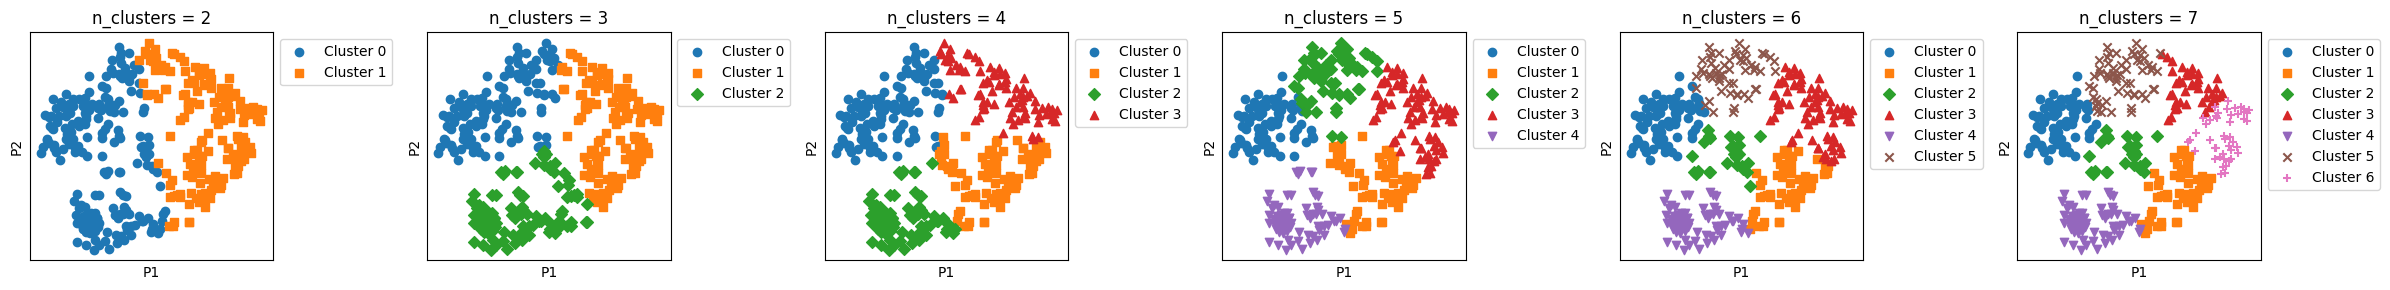

In [100]:
# K-Means with TSNE
from sklearn.cluster import KMeans

n_clusters_range = range(2, 8) 
fig, axes = plt.subplots(1, len(n_clusters_range), figsize=(24, 3))

markers = ['o', 's', 'D', '^', 'v', 'x', '+'] 

for i, n_clusters in enumerate(n_clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    clusters = kmeans.fit_predict(data_tsne) 

    for cluster in np.unique(clusters):
        axes[i].scatter(data_tsne['T1'][clusters == cluster], 
                        data_tsne['T2'][clusters == cluster], 
                        marker=markers[cluster],  
                        label=f'Cluster {cluster}')

    axes[i].set_title(f'n_clusters = {n_clusters}', fontsize=12)
    axes[i].set_xlabel('P1')
    axes[i].set_ylabel('P2')
    axes[i].set_xticks([])  
    axes[i].set_yticks([])  
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  

plt.tight_layout()
plt.show()


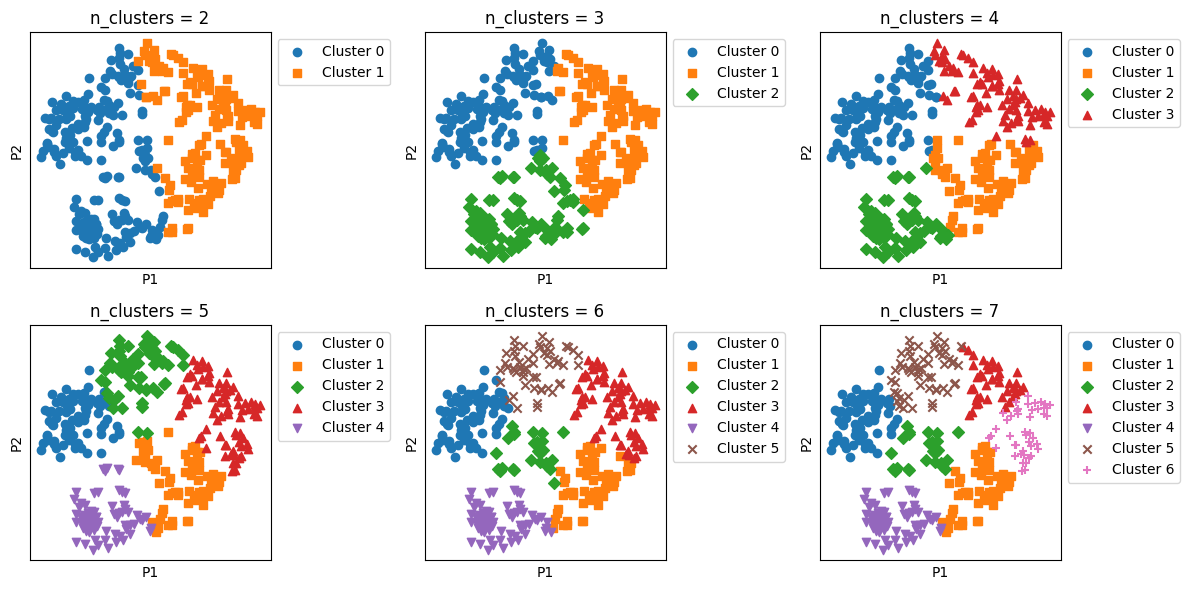

In [101]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

n_clusters_range = range(2, 8)  
fig, axes = plt.subplots(2, 3, figsize=(12, 6)) 
axes = axes.flatten()

markers = ['o', 's', 'D', '^', 'v', 'x', '+']

for i, n_clusters in enumerate(n_clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_tsne)

    for cluster in np.unique(clusters):
        axes[i].scatter(data_tsne['T1'][clusters == cluster], 
                        data_tsne['T2'][clusters == cluster], 
                        marker=markers[cluster],  
                        label=f'Cluster {cluster}')

    axes[i].set_title(f'n_clusters = {n_clusters}', fontsize=12)
    axes[i].set_xlabel('P1')
    axes[i].set_ylabel('P2')
    axes[i].set_xticks([])  
    axes[i].set_yticks([])  
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1)) 

for j in range(len(n_clusters_range), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


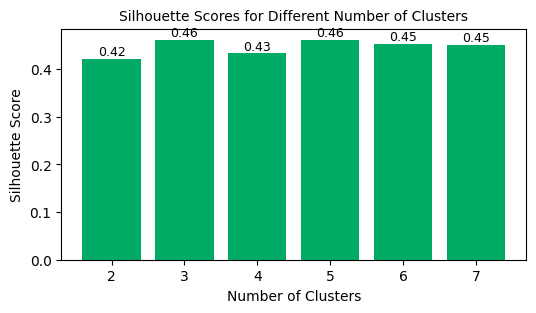

In [102]:
# Check optimum cluster number with Silhouette Score
from sklearn.metrics import silhouette_score

k = [2, 3, 4, 5, 6, 7]
silhouette_scores = []

for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  
    clusters = kmeans.fit_predict(data_tsne)  
    score = silhouette_score(data_tsne, clusters)  
    silhouette_scores.append(score)

plt.figure(figsize=(6, 3))
bars = plt.bar(k, silhouette_scores, color='#00AB66')

for bar, score in zip(bars, silhouette_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.0001, 
             f'{score:.2f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Number of Clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.title('Silhouette Scores for Different Number of Clusters', fontsize=10)
plt.show()


In [103]:
tsne_data = pd.concat([data_tsne,students_data],axis=1)
tsne_data.head()

,T1,T2,Score
0,1.173714,12.104099,99.0
1,-1.232418,10.081619,99.0
2,-0.183221,12.694817,100.0
3,0.647270,11.395861,100.0
4,-6.448457,4.831880,98.0


In [104]:
data

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546
4,16,67,172.734196,777,85,12,0,1,1,0,0,279
...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,0,0.000000,0,0,0,0,0,0,0,124,3194
348,19,115,1557.472438,0,0,0,0,4,0,1,2,402
349,28,65,2797.972734,0,0,0,0,2,1,1,149,3276
350,18,33,10770.620000,0,0,0,1,5,0,4,186,4146


In [105]:
from sklearn.preprocessing import OrdinalEncoder

df_cluster = data.copy()
encoder = OrdinalEncoder()
df_cluster = encoder.fit_transform(df_cluster)

In [106]:
df_cluster = pd.DataFrame(df_cluster)
df_cluster_numeric = df_cluster.select_dtypes(include=[float, int])
df_cluster_clean = df_cluster_numeric.fillna(df_cluster_numeric.mean())

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster_clean['Cluster'] = kmeans.fit_predict(df_cluster_clean)
df_cluster_clean.head()


,0,1,2,3,4,5,6,7,8,9,10,11,Cluster
0,34.0,33.0,181.0,250.0,104.0,12.0,0.0,1.0,0.0,1.0,130.0,137.0,1
1,20.0,25.0,104.0,258.0,105.0,6.0,0.0,0.0,0.0,2.0,54.0,86.0,1
2,1.0,16.0,37.0,185.0,62.0,9.0,1.0,1.0,1.0,1.0,76.0,113.0,0
3,22.0,37.0,53.0,256.0,107.0,15.0,0.0,3.0,3.0,3.0,14.0,76.0,0
4,16.0,58.0,38.0,32.0,78.0,11.0,0.0,1.0,1.0,0.0,0.0,15.0,0


In [107]:
df_cluster = pd.concat([df_cluster,students_data],axis=1)
df_cluster.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Score
0,34.0,33.0,181.0,250.0,104.0,12.0,0.0,1.0,0.0,1.0,130.0,137.0,99.0
1,20.0,25.0,104.0,258.0,105.0,6.0,0.0,0.0,0.0,2.0,54.0,86.0,99.0
2,1.0,16.0,37.0,185.0,62.0,9.0,1.0,1.0,1.0,1.0,76.0,113.0,100.0
3,22.0,37.0,53.0,256.0,107.0,15.0,0.0,3.0,3.0,3.0,14.0,76.0,100.0
4,16.0,58.0,38.0,32.0,78.0,11.0,0.0,1.0,1.0,0.0,0.0,15.0,98.0


In [108]:
# Sort the DataFrame by the 'Cluster' 
df_cluster_sorted = df_cluster_clean.sort_values(by='Cluster', ascending=True)
df_cluster_sorted.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster
175,0.0,0.0,0.0,70.0,88.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0
142,2.0,4.0,22.0,193.0,27.0,2.0,0.0,22.0,2.0,24.0,0.0,32.0,0
143,1.0,1.0,0.0,39.0,11.0,2.0,0.0,3.0,1.0,3.0,0.0,4.0,0
145,15.0,30.0,32.0,143.0,44.0,4.0,0.0,0.0,0.0,3.0,69.0,107.0,0
147,0.0,0.0,0.0,171.0,66.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [109]:
# Check cluster size
cluster_sizes = df_cluster_sorted['Cluster'].value_counts()
print(cluster_sizes)

Cluster
0    141
2    109
1    102
Name: count, dtype: int64


In [110]:
df_cluster2 = pd.concat([data, df_cluster_clean['Cluster'],students_data],axis=1)
df_cluster2.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Cluster,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,1,99.0
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,1,99.0
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,0,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,0,100.0
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,0,98.0


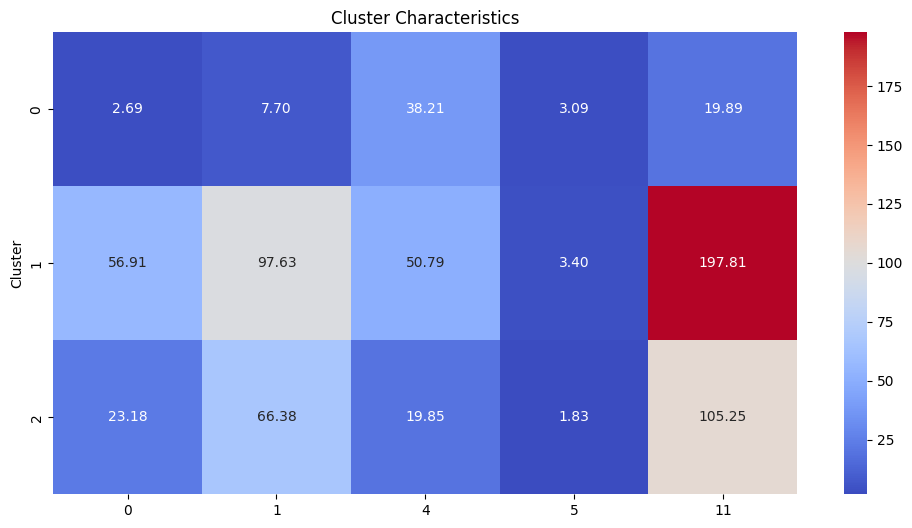

In [111]:
# Analyze Each Cluster (calculate the mean of each feature for each cluster)
#I choose 5 features to represent students' profile

features = [0, 1, 4, 5, 11]
cluster_summary = df_cluster_sorted.groupby('Cluster')[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Characteristics')
plt.show()

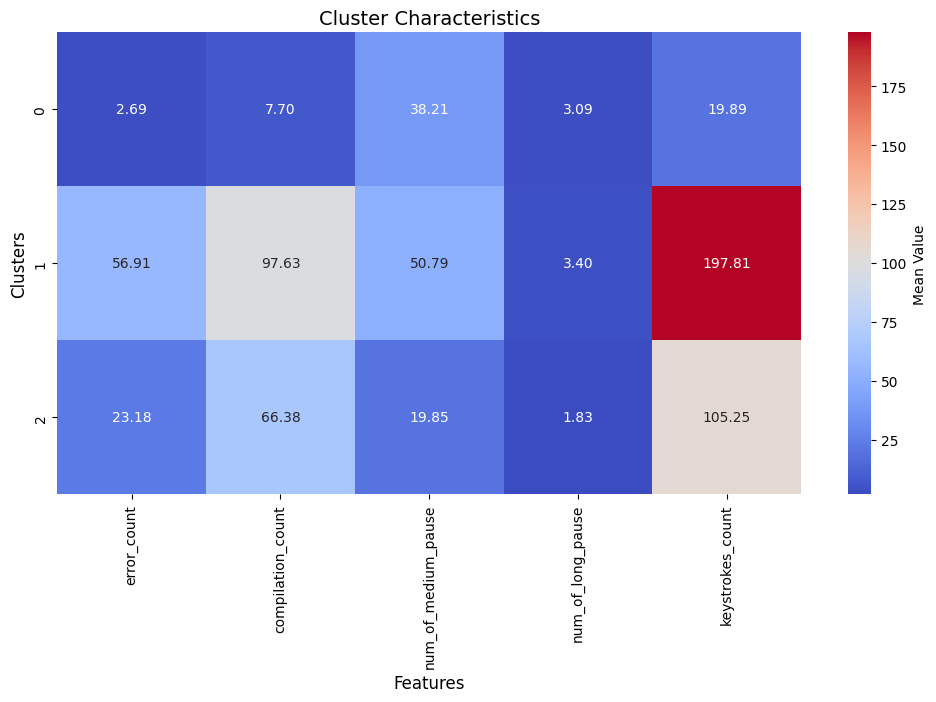

In [112]:
# Change the x-axis labels
features = [0, 1, 4, 5, 11]
custom_labels = ['error_count', 'compilation_count', 'num_of_medium_pause', 'num_of_long_pause', 'keystrokes_count']

cluster_summary = df_cluster_sorted.groupby('Cluster')[features].mean()
cluster_summary.columns = custom_labels

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Mean Value'})

plt.title('Cluster Characteristics', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.show()

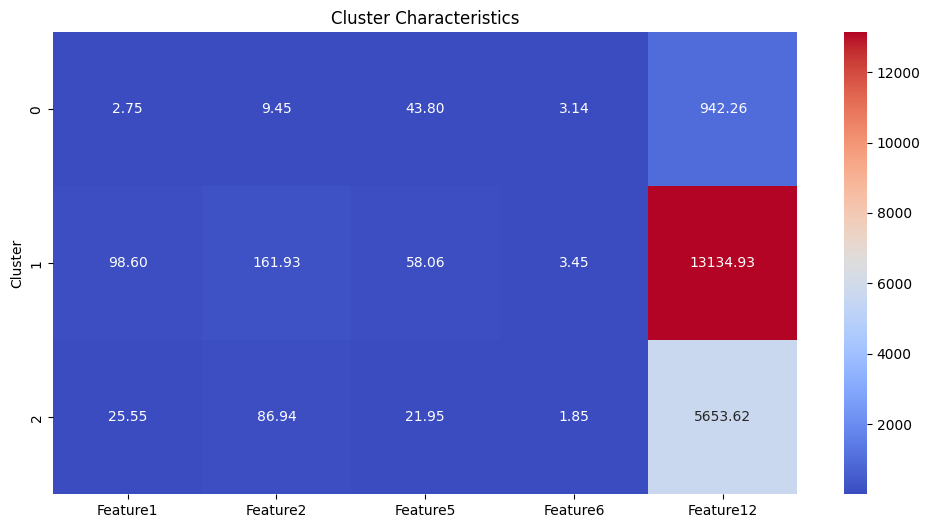

In [113]:
# Analyze Each Cluster (calculate the mean of each feature for each cluster)
#I choose 5 features to represent 

features = ['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']
cluster_summary = df_cluster2.groupby('Cluster')[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Characteristics')
plt.show()

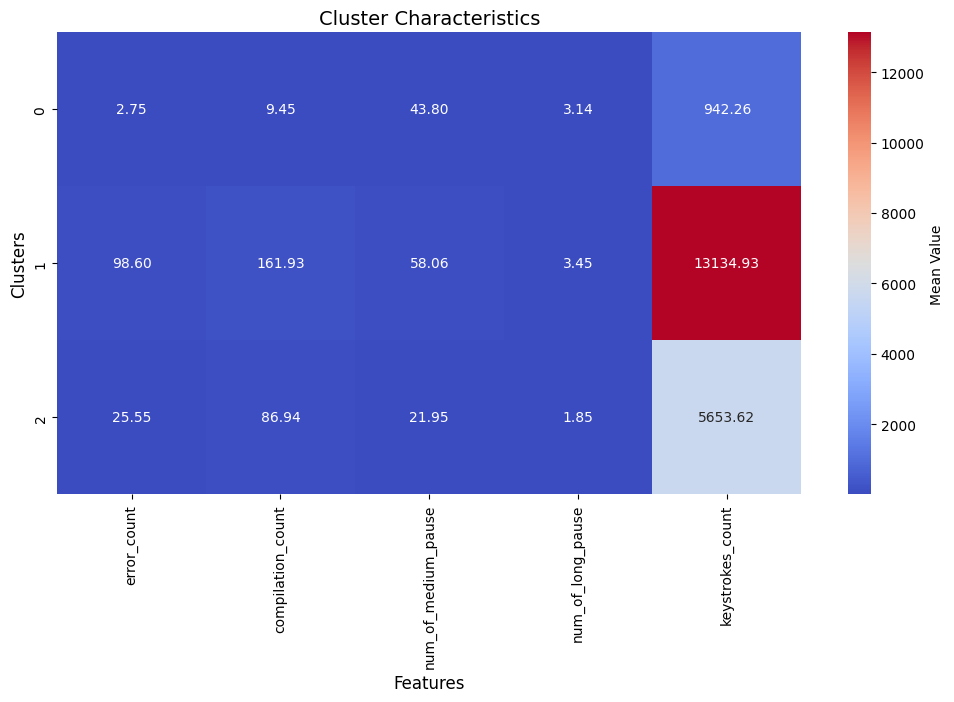

In [114]:
# Change the x-axis labels
features = ['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']
custom_labels = ['error_count', 'compilation_count', 'num_of_medium_pause', 'num_of_long_pause', 'keystrokes_count']

cluster_summary = df_cluster2.groupby('Cluster')[features].mean()
cluster_summary.columns = custom_labels

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Mean Value'})

plt.title('Cluster Characteristics', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.show()

In [115]:
# Get data-score
data_score = pd.concat([data,students_data],axis=1)
data_score.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,99.0
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,99.0
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,100.0
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,98.0


In [116]:
# Save or Analyze Specific Clusters
cluster_0_students = data_score[df_cluster_sorted['Cluster'] == 0]
cluster_0_students.head()

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_41088/1694170263.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_0_students = data_score[df_cluster_sorted['Cluster'] == 0]


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
2,1,21,161.739250,9722,66,9,1,1,1,1,209,6257,100.0
3,22,44,244.912255,25486,256,17,0,3,3,3,43,3546,100.0
4,16,67,172.734196,777,85,12,0,1,1,0,0,279,98.0
5,0,0,0.000000,5301,90,16,0,0,0,0,0,0,0.0
6,13,14,329.232538,13734,115,11,1,1,0,0,158,3040,82.0


In [117]:
# Save or Analyze Specific Clusters
cluster_1_students = data_score[df_cluster_sorted['Cluster'] == 1]
cluster_1_students.head()

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_41088/445141314.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_1_students = data_score[df_cluster_sorted['Cluster'] == 1]


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
0,34,40,2203.476307,19352,153,13,0,1,0,1,386,7377,99.0
1,20,31,723.473800,27359,175,6,0,0,0,2,146,4467,99.0
16,46,75,128.630337,17680,70,3,0,5,0,2,413,8191,70.0
17,56,112,137.520666,13076,87,7,3,0,3,3,425,9966,88.0
18,2,11,280.508500,13375,97,1,2,1,1,2,259,10255,45.0


In [118]:
# Save or Analyze Specific Clusters
cluster_2_students = data_score[df_cluster_sorted['Cluster'] == 2]
cluster_2_students.head()

/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_41088/1313934696.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_2_students = data_score[df_cluster_sorted['Cluster'] == 2]


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Score
20,7,143,581.347915,1556,44,2,0,1,1,0,0,325,86.0
21,0,102,728.258217,7594,90,3,0,3,1,3,79,4730,97.0
23,2,4,23138.576330,6106,86,11,0,4,1,2,30,574,88.0
39,7,8,63088.609430,8211,109,5,0,4,2,4,118,2066,95.0
44,2,52,1296.161705,6655,120,7,0,2,1,6,101,4626,0.0


In [119]:
#cluster_0_students.describe().round(2)
cluster_0_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,141.00,141.00,141.00,141.00,141.00
mean,2.75,9.45,43.80,3.14,942.26
std,8.54,21.66,39.81,3.34,1839.18
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,10.00,0.00,0.00
50%,0.00,0.00,37.00,3.00,0.00
75%,0.00,6.00,66.00,5.00,585.00
max,64.00,126.00,256.00,17.00,7421.00


In [120]:
#cluster_1_students.describe().round(2)
cluster_1_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,102.00,102.00,102.00,102.00,102.00
mean,98.60,161.93,58.06,3.45,13134.93
std,87.39,108.84,36.89,3.24,5594.21
min,0.00,0.00,0.00,0.00,4467.00
25%,31.50,78.00,33.25,1.00,9159.25
50%,66.50,137.00,55.50,3.00,12170.00
75%,148.50,225.00,80.00,5.00,15804.00
max,337.00,444.00,186.00,18.00,34619.00


In [121]:
#cluster_2_students.describe().round(2)
cluster_2_students[['Feature1', 'Feature2', 'Feature5', 'Feature6', 'Feature12']].describe().round(2)

,Feature1,Feature2,Feature5,Feature6,Feature12
count,109.00,109.00,109.00,109.00,109.00
mean,25.55,86.94,21.95,1.85,5653.62
std,27.64,57.39,31.07,2.88,3940.46
min,0.00,4.00,0.00,0.00,208.00
25%,7.00,50.00,0.00,0.00,2383.00
50%,21.00,74.00,0.00,0.00,5179.00
75%,36.00,109.00,38.00,3.00,7939.00
max,184.00,369.00,120.00,12.00,17438.00
